# 강서구 빅데이터 공모전

## 1. 환경 설정 및 데이터 불러오기

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

PATH = "/content/drive/MyDrive/공모전/강서구_빅데이터_공모전/"

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,173 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [ ]:
# ctrl(cmd) + /
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

In [ ]:
from IPython.display import set_matplotlib_formats
# 폰트가 선명하게 보이기 위해
set_matplotlib_formats('retina')

In [ ]:
df = pd.read_csv(PATH+'data/accidentInfoList_2019-2021.csv', encoding='cp949')

In [ ]:
df.shape

(4905, 22)

In [ ]:
df.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010100100001,2019년 1월 1일 00시,화요일,서울특별시 강서구 방화동,경상사고,0,0,1,0,차대사람 - 횡단중,...,맑음,교차로 - 교차로횡단보도내,승용,남,26세,상해없음,보행자,남,40세,경상
1,2019010100100140,2019년 1월 1일 11시,화요일,서울특별시 강서구 마곡동,경상사고,0,0,3,0,차대차 - 기타,...,맑음,교차로 - 교차로부근,승용,여,62세,상해없음,승용,남,31세,경상
2,2019010100100276,2019년 1월 1일 19시,화요일,서울특별시 강서구 방화동,중상사고,0,1,1,0,차대사람 - 횡단중,...,맑음,단일로 - 기타,승용,여,64세,상해없음,보행자,여,17세,중상
3,2019010200100187,2019년 1월 2일 12시,수요일,서울특별시 강서구 마곡동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,단일로 - 기타,승용,남,70세,상해없음,승용,남,27세,경상
4,2019010200100237,2019년 1월 2일 14시,수요일,서울특별시 강서구 화곡동,경상사고,0,0,1,0,차대차 - 추돌,...,맑음,단일로 - 기타,이륜,남,25세,경상,이륜,남,26세,상해없음


## 2. 데이터 통계

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4905 entries, 0 to 4904
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        4905 non-null   int64 
 1   사고일시        4905 non-null   object
 2   요일          4905 non-null   object
 3   시군구         4905 non-null   object
 4   사고내용        4905 non-null   object
 5   사망자수        4905 non-null   int64 
 6   중상자수        4905 non-null   int64 
 7   경상자수        4905 non-null   int64 
 8   부상신고자수      4905 non-null   int64 
 9   사고유형        4905 non-null   object
 10  법규위반        4905 non-null   object
 11  노면상태        4905 non-null   object
 12  기상상태        4905 non-null   object
 13  도로형태        4905 non-null   object
 14  가해운전자 차종    4905 non-null   object
 15  가해운전자 성별    4905 non-null   object
 16  가해운전자 연령    4905 non-null   object
 17  가해운전자 상해정도  4905 non-null   object
 18  피해운전자 차종    4753 non-null   object
 19  피해운전자 성별    4753 non-null   object
 20  피해운전자 연령

### 2-1. 결측치

In [ ]:
null_count = df.isnull().sum()
null_count

사고번호            0
사고일시            0
요일              0
시군구             0
사고내용            0
사망자수            0
중상자수            0
경상자수            0
부상신고자수          0
사고유형            0
법규위반            0
노면상태            0
기상상태            0
도로형태            0
가해운전자 차종        0
가해운전자 성별        0
가해운전자 연령        0
가해운전자 상해정도      0
피해운전자 차종      152
피해운전자 성별      152
피해운전자 연령      152
피해운전자 상해정도    152
dtype: int64

<Axes: >

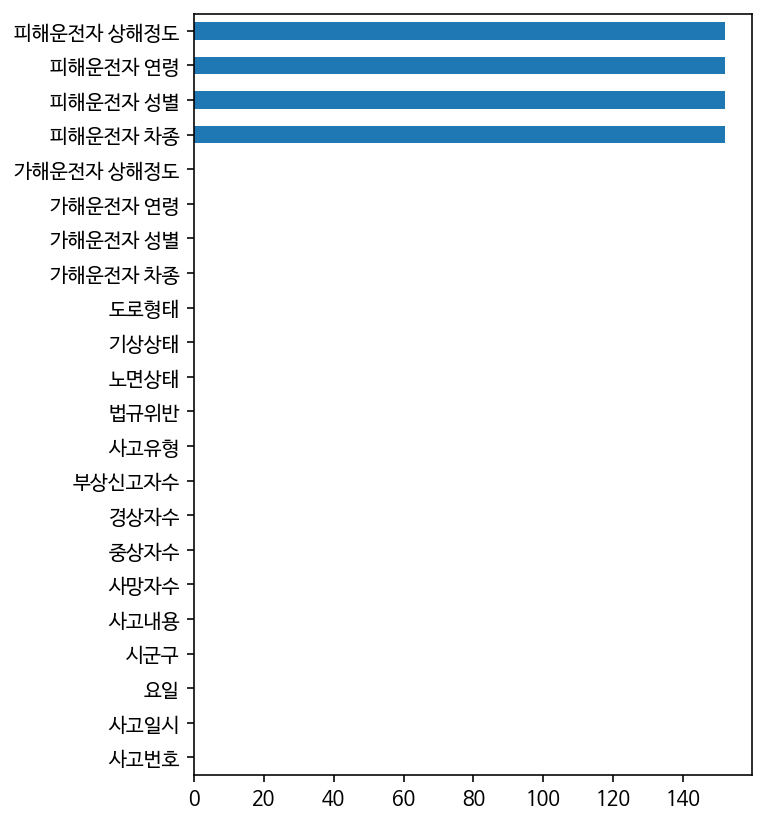

In [ ]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다.
null_count.plot.barh(figsize=(5,7))

### 2-2. 기술통계

In [ ]:
df.describe()

,사고번호,사망자수,중상자수,경상자수,부상신고자수
count,4.905000e+03,4905.000000,4905.000000,4905.000000,4905.00000
mean,2.020001e+15,0.010194,0.271560,1.002854,0.08420
std,8.217362e+11,0.100458,0.502904,0.939868,0.36357
min,2.019010e+15,0.000000,0.000000,0.000000,0.00000
25%,2.019091e+15,0.000000,0.000000,0.000000,0.00000
50%,2.020052e+15,0.000000,0.000000,1.000000,0.00000
75%,2.021032e+15,0.000000,1.000000,1.000000,0.00000
max,2.021123e+15,1.000000,7.000000,13.000000,9.00000


In [ ]:
# describe로 문자열 데이터타입의 요약을 봅니다.
df.describe(include="object")

,사고일시,요일,시군구,사고내용,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
count,4905,4905,4905,4905,4905,4905,4905,4905,4905,4905,4905,4905,4905,4753,4753,4753,4753
unique,4336,7,13,4,14,11,9,5,11,10,3,81,6,11,3,91,6
top,2021년 6월 25일 17시,목요일,서울특별시 강서구 화곡동,경상사고,차대차 - 측면충돌,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,61세,상해없음,승용,남,39세,경상
freq,4,776,1849,3387,1411,2884,4371,4245,2214,2995,3925,134,3719,2141,3452,120,2963


### 2-3. 유형별 개수

In [ ]:
len(df.describe(include="object").columns.drop('사고일시'))

16

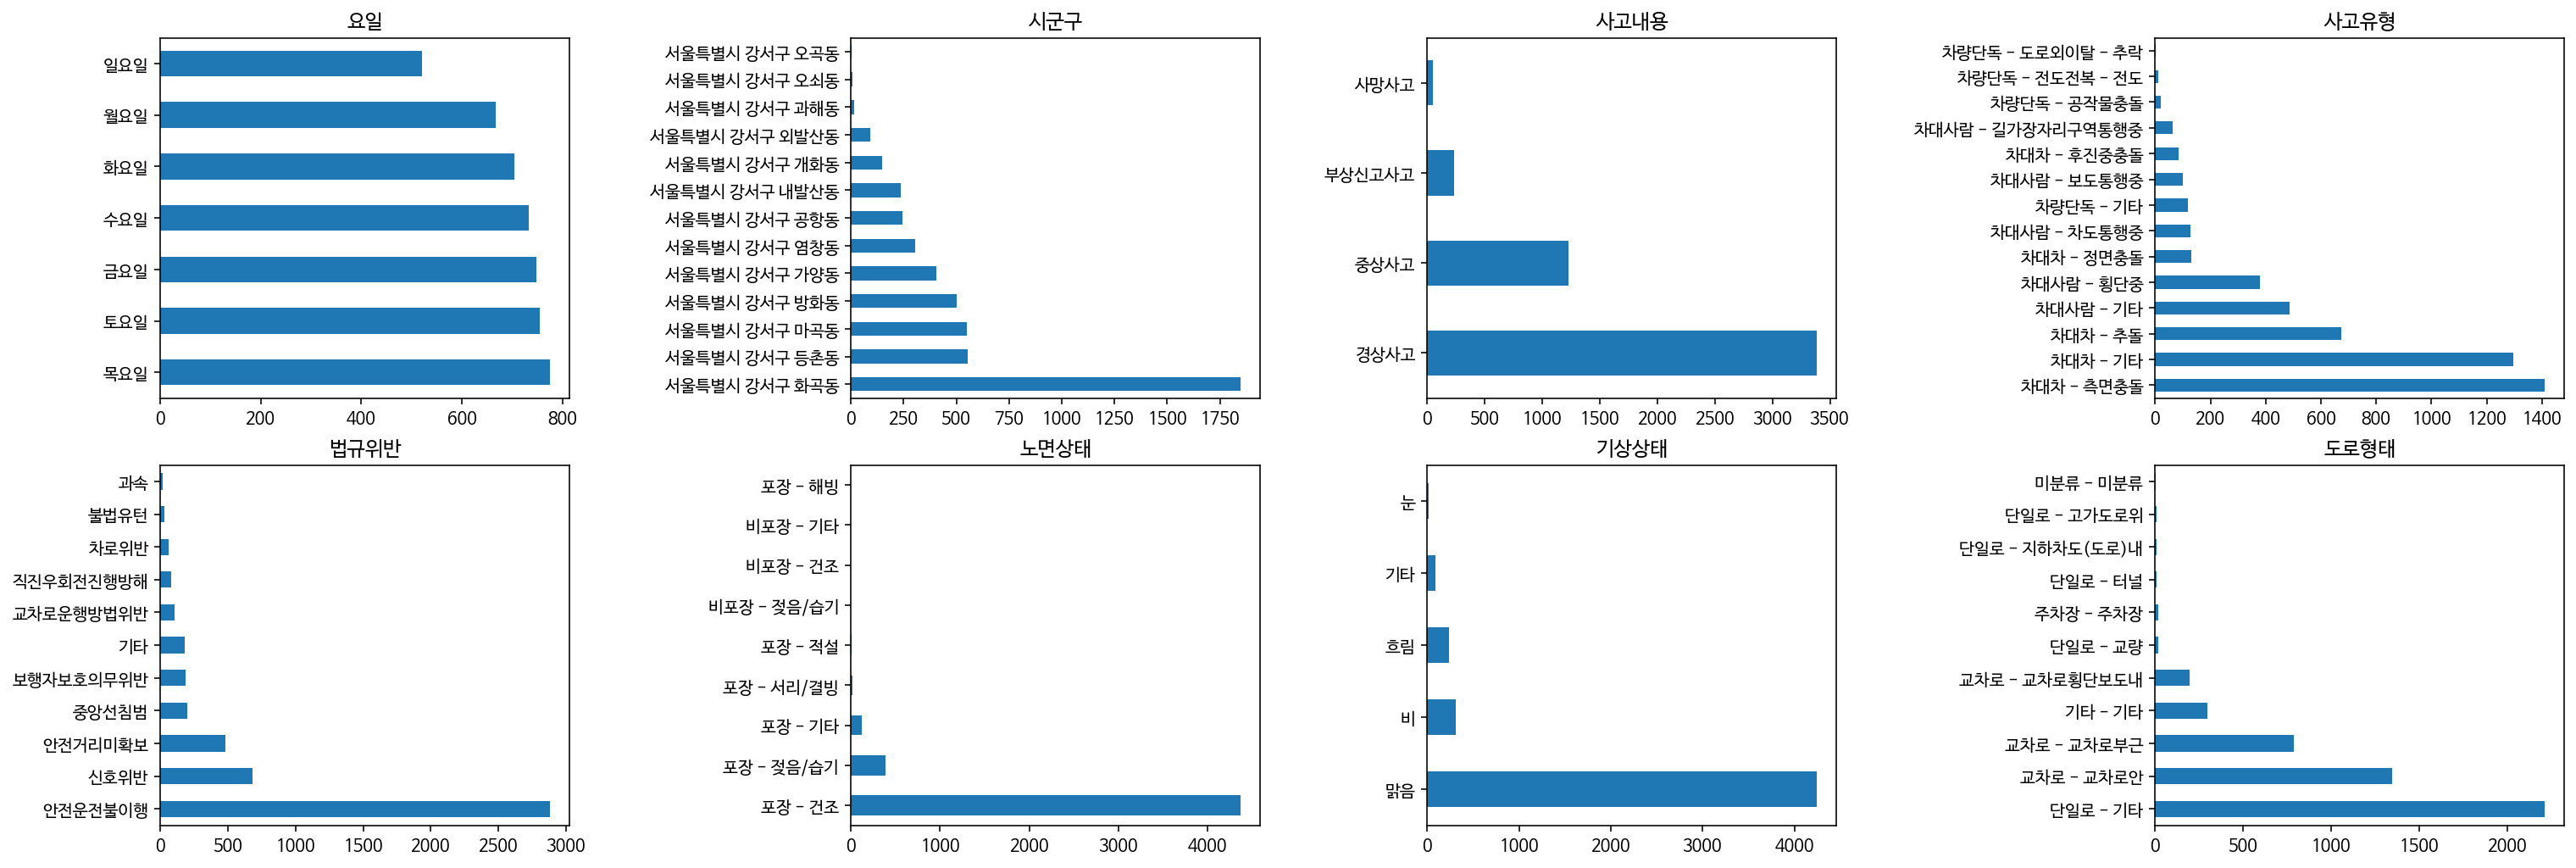

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(21,7), 
                        gridspec_kw={'wspace':0.1},
                        constrained_layout=True)

obj_col = df.describe(include="object").columns.drop('사고일시')[:8]

for row in range(2):
    for col in range(4):
        idx = row * 4 + col
        
        if idx < len(obj_col):
            ax = axes[row][col]
            ax.set_title(obj_col[idx])
            df[obj_col[idx]].value_counts().plot.barh(ax=ax)

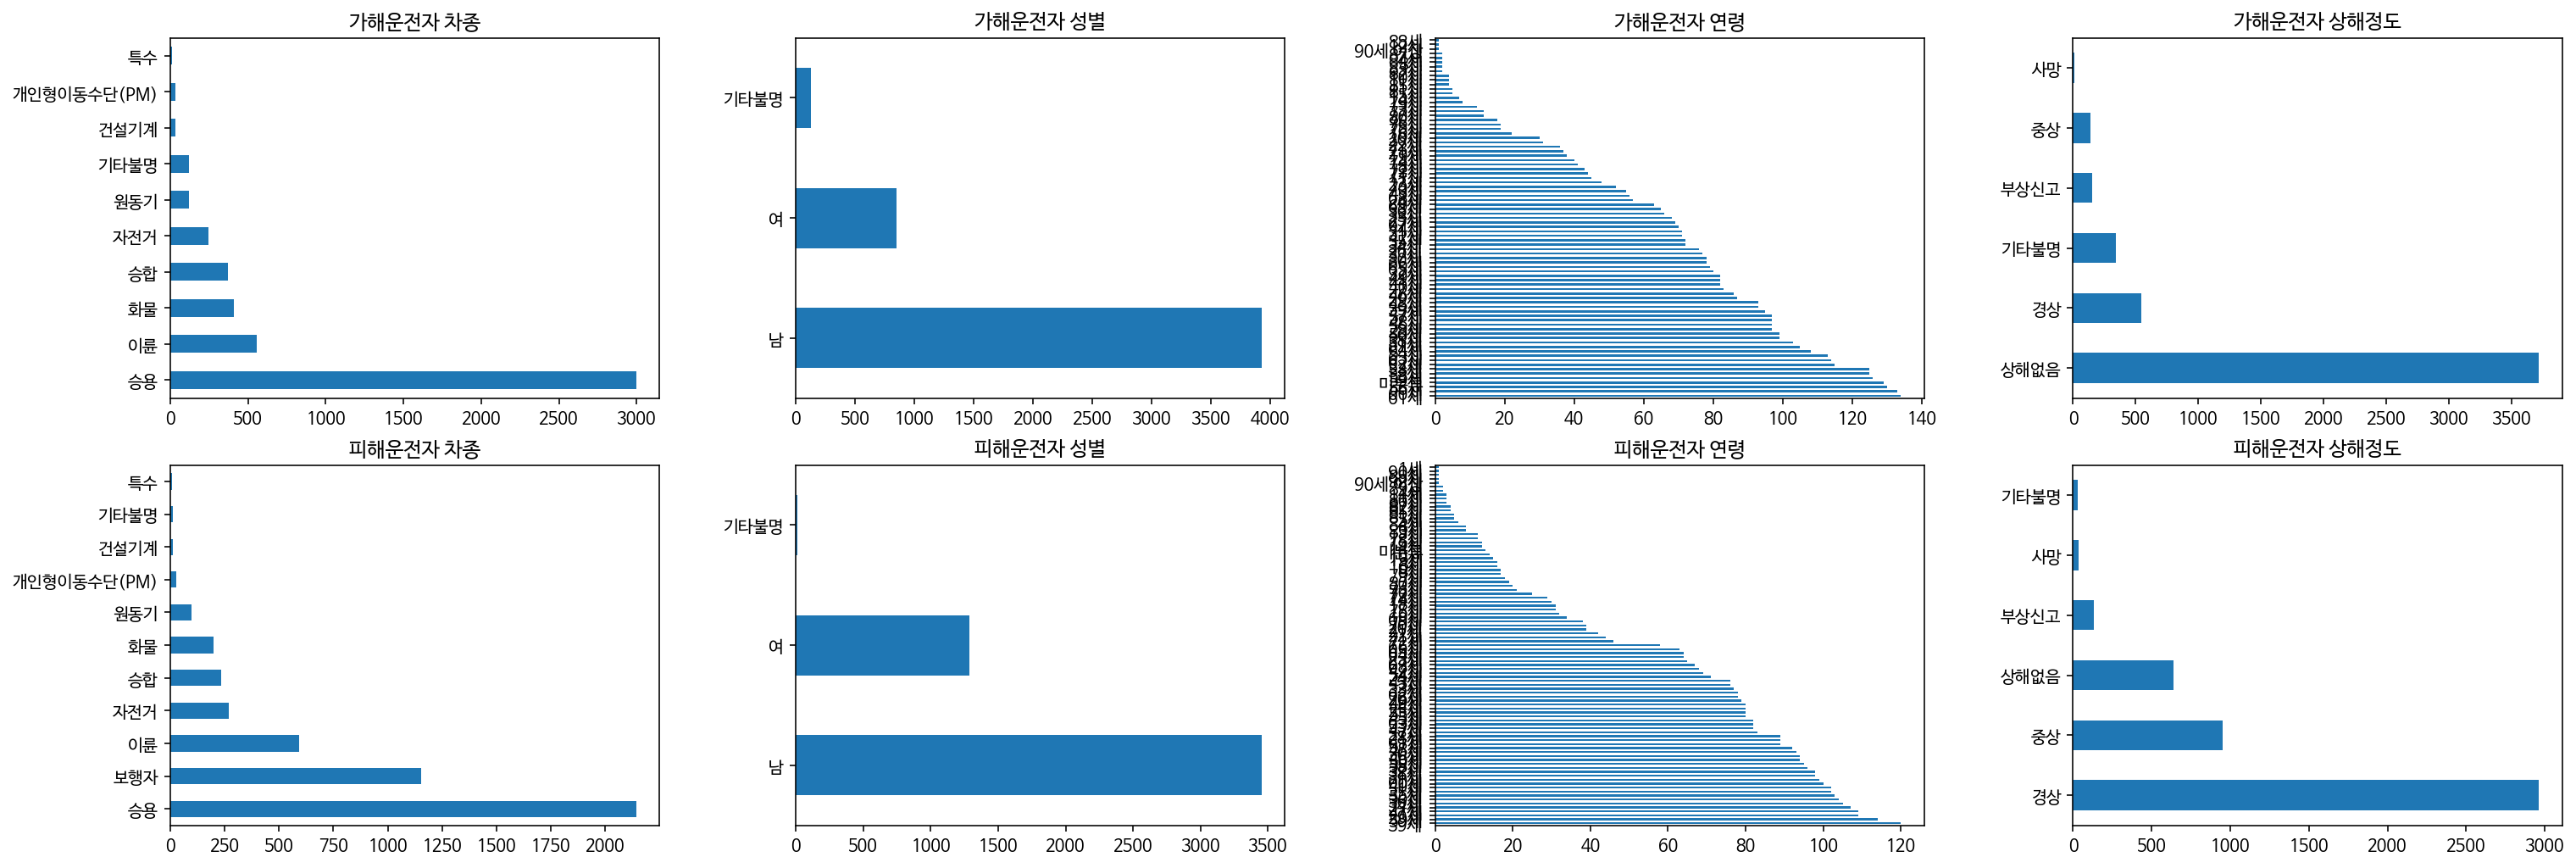

In [ ]:
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(21,7), 
                        gridspec_kw={'wspace':0.1},
                        constrained_layout=True)

obj_col = df.describe(include="object").columns.drop('사고일시')[8:]

for row in range(2):
    for col in range(4):
        idx = row * 4 + col
        
        if idx < len(obj_col):
            ax = axes[row][col]
            ax.set_title(obj_col[idx])
            df[obj_col[idx]].value_counts().plot.barh(ax=ax)

[Text(0, 0, '10세'),
 Text(1, 0, '11세'),
 Text(2, 0, '12세'),
 Text(3, 0, '13세'),
 Text(4, 0, '14세'),
 Text(5, 0, '15세'),
 Text(6, 0, '16세'),
 Text(7, 0, '17세'),
 Text(8, 0, '18세'),
 Text(9, 0, '19세'),
 Text(10, 0, '20세'),
 Text(11, 0, '21세'),
 Text(12, 0, '22세'),
 Text(13, 0, '23세'),
 Text(14, 0, '24세'),
 Text(15, 0, '25세'),
 Text(16, 0, '26세'),
 Text(17, 0, '27세'),
 Text(18, 0, '28세'),
 Text(19, 0, '29세'),
 Text(20, 0, '30세'),
 Text(21, 0, '31세'),
 Text(22, 0, '32세'),
 Text(23, 0, '33세'),
 Text(24, 0, '34세'),
 Text(25, 0, '35세'),
 Text(26, 0, '36세'),
 Text(27, 0, '37세'),
 Text(28, 0, '38세'),
 Text(29, 0, '39세'),
 Text(30, 0, '40세'),
 Text(31, 0, '41세'),
 Text(32, 0, '42세'),
 Text(33, 0, '43세'),
 Text(34, 0, '44세'),
 Text(35, 0, '45세'),
 Text(36, 0, '46세'),
 Text(37, 0, '47세'),
 Text(38, 0, '48세'),
 Text(39, 0, '49세'),
 Text(40, 0, '50세'),
 Text(41, 0, '51세'),
 Text(42, 0, '52세'),
 Text(43, 0, '53세'),
 Text(44, 0, '54세'),
 Text(45, 0, '55세'),
 Text(46, 0, '56세'),
 Text(47, 0, '57세'),
 T

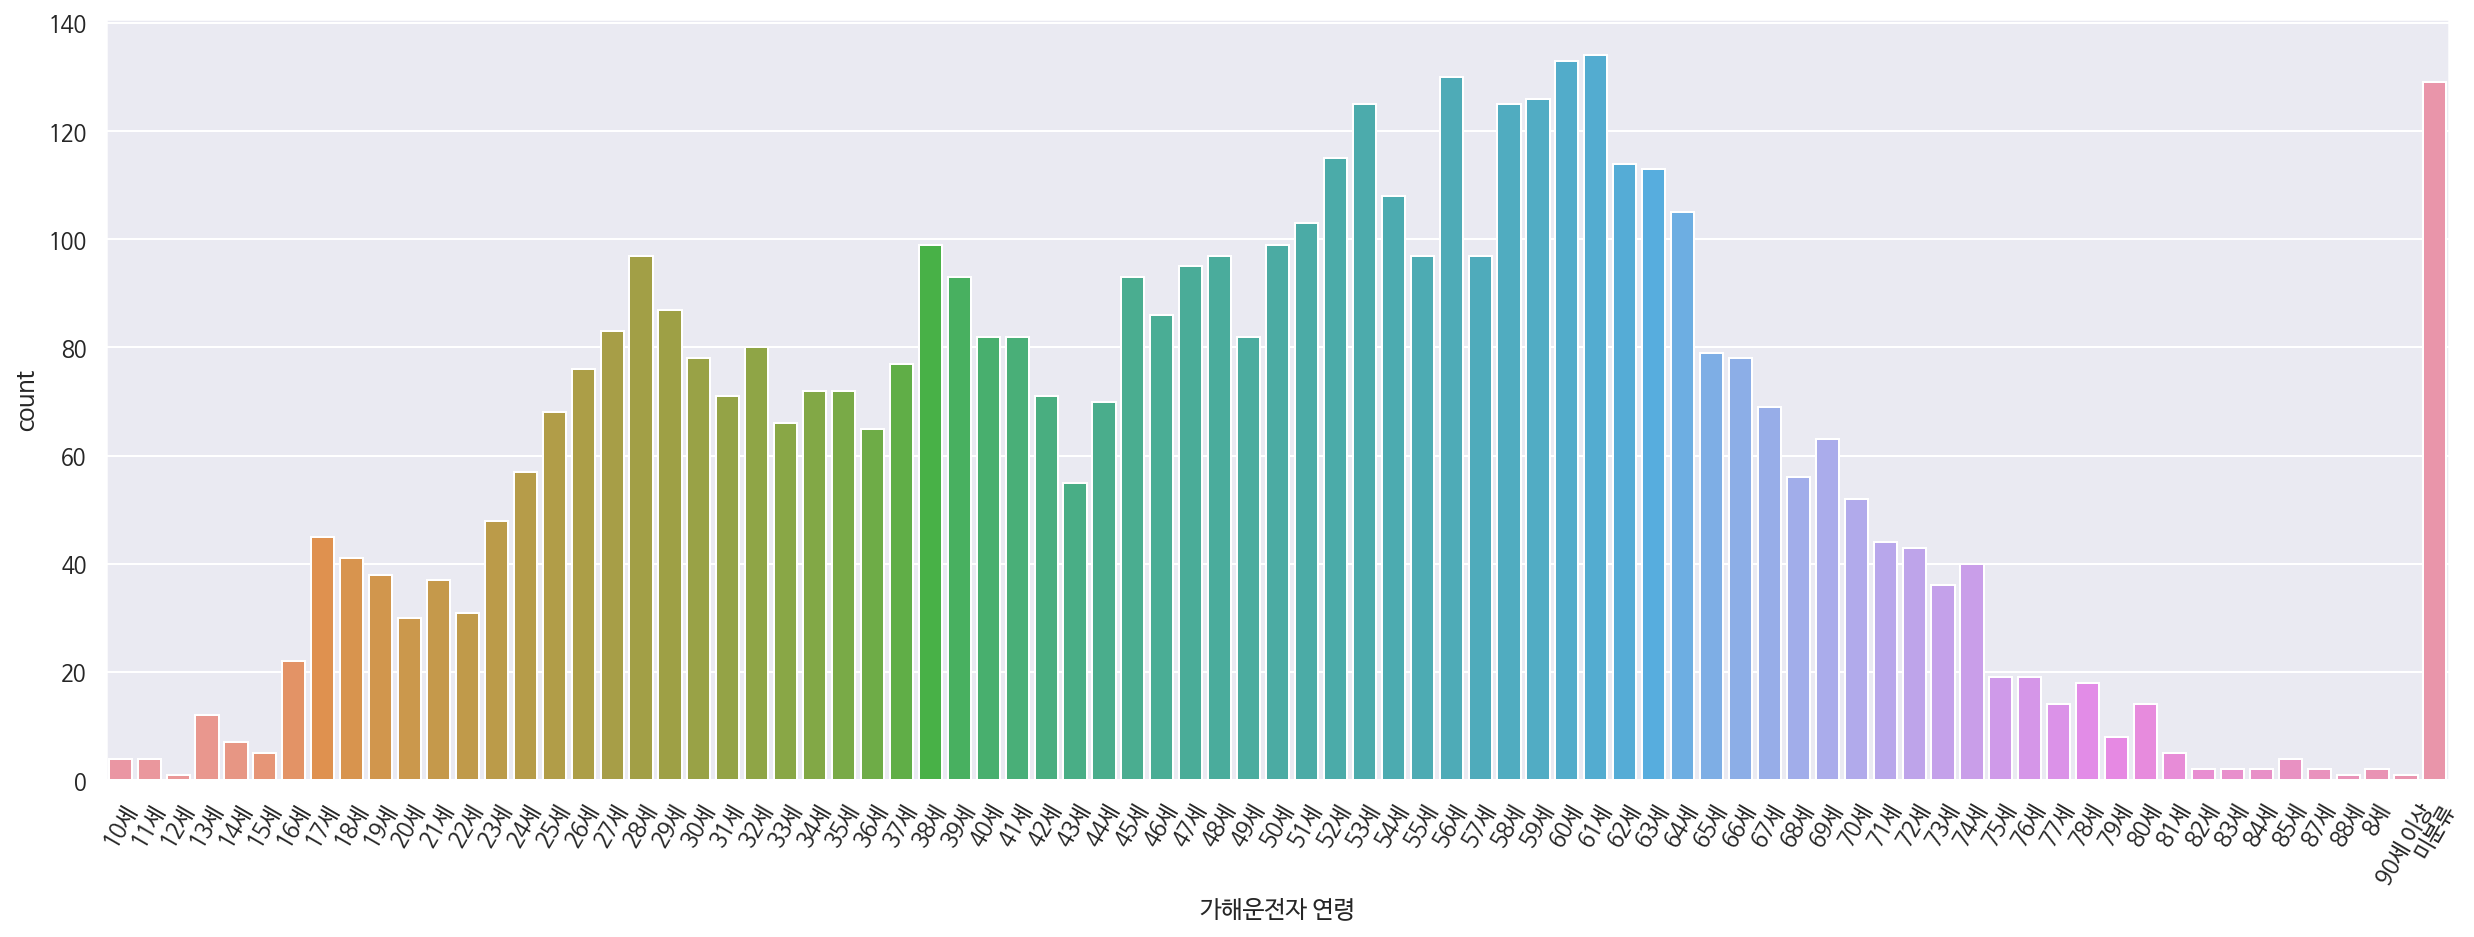

In [ ]:
age = df['가해운전자 연령'].unique()
age.sort()

sns.set(rc={'figure.figsize':(21,7)})
plt.rc('font', family='NanumBarunGothic')

ax = sns.countplot(data=df, x='가해운전자 연령', order=age)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

[Text(0, 0, '10세'),
 Text(1, 0, '11세'),
 Text(2, 0, '12세'),
 Text(3, 0, '13세'),
 Text(4, 0, '14세'),
 Text(5, 0, '15세'),
 Text(6, 0, '16세'),
 Text(7, 0, '17세'),
 Text(8, 0, '18세'),
 Text(9, 0, '19세'),
 Text(10, 0, '1세'),
 Text(11, 0, '20세'),
 Text(12, 0, '21세'),
 Text(13, 0, '22세'),
 Text(14, 0, '23세'),
 Text(15, 0, '24세'),
 Text(16, 0, '25세'),
 Text(17, 0, '26세'),
 Text(18, 0, '27세'),
 Text(19, 0, '28세'),
 Text(20, 0, '29세'),
 Text(21, 0, '30세'),
 Text(22, 0, '31세'),
 Text(23, 0, '32세'),
 Text(24, 0, '33세'),
 Text(25, 0, '34세'),
 Text(26, 0, '35세'),
 Text(27, 0, '36세'),
 Text(28, 0, '37세'),
 Text(29, 0, '38세'),
 Text(30, 0, '39세'),
 Text(31, 0, '40세'),
 Text(32, 0, '41세'),
 Text(33, 0, '42세'),
 Text(34, 0, '43세'),
 Text(35, 0, '44세'),
 Text(36, 0, '45세'),
 Text(37, 0, '46세'),
 Text(38, 0, '47세'),
 Text(39, 0, '48세'),
 Text(40, 0, '49세'),
 Text(41, 0, '4세'),
 Text(42, 0, '50세'),
 Text(43, 0, '51세'),
 Text(44, 0, '52세'),
 Text(45, 0, '53세'),
 Text(46, 0, '54세'),
 Text(47, 0, '55세'),
 Tex

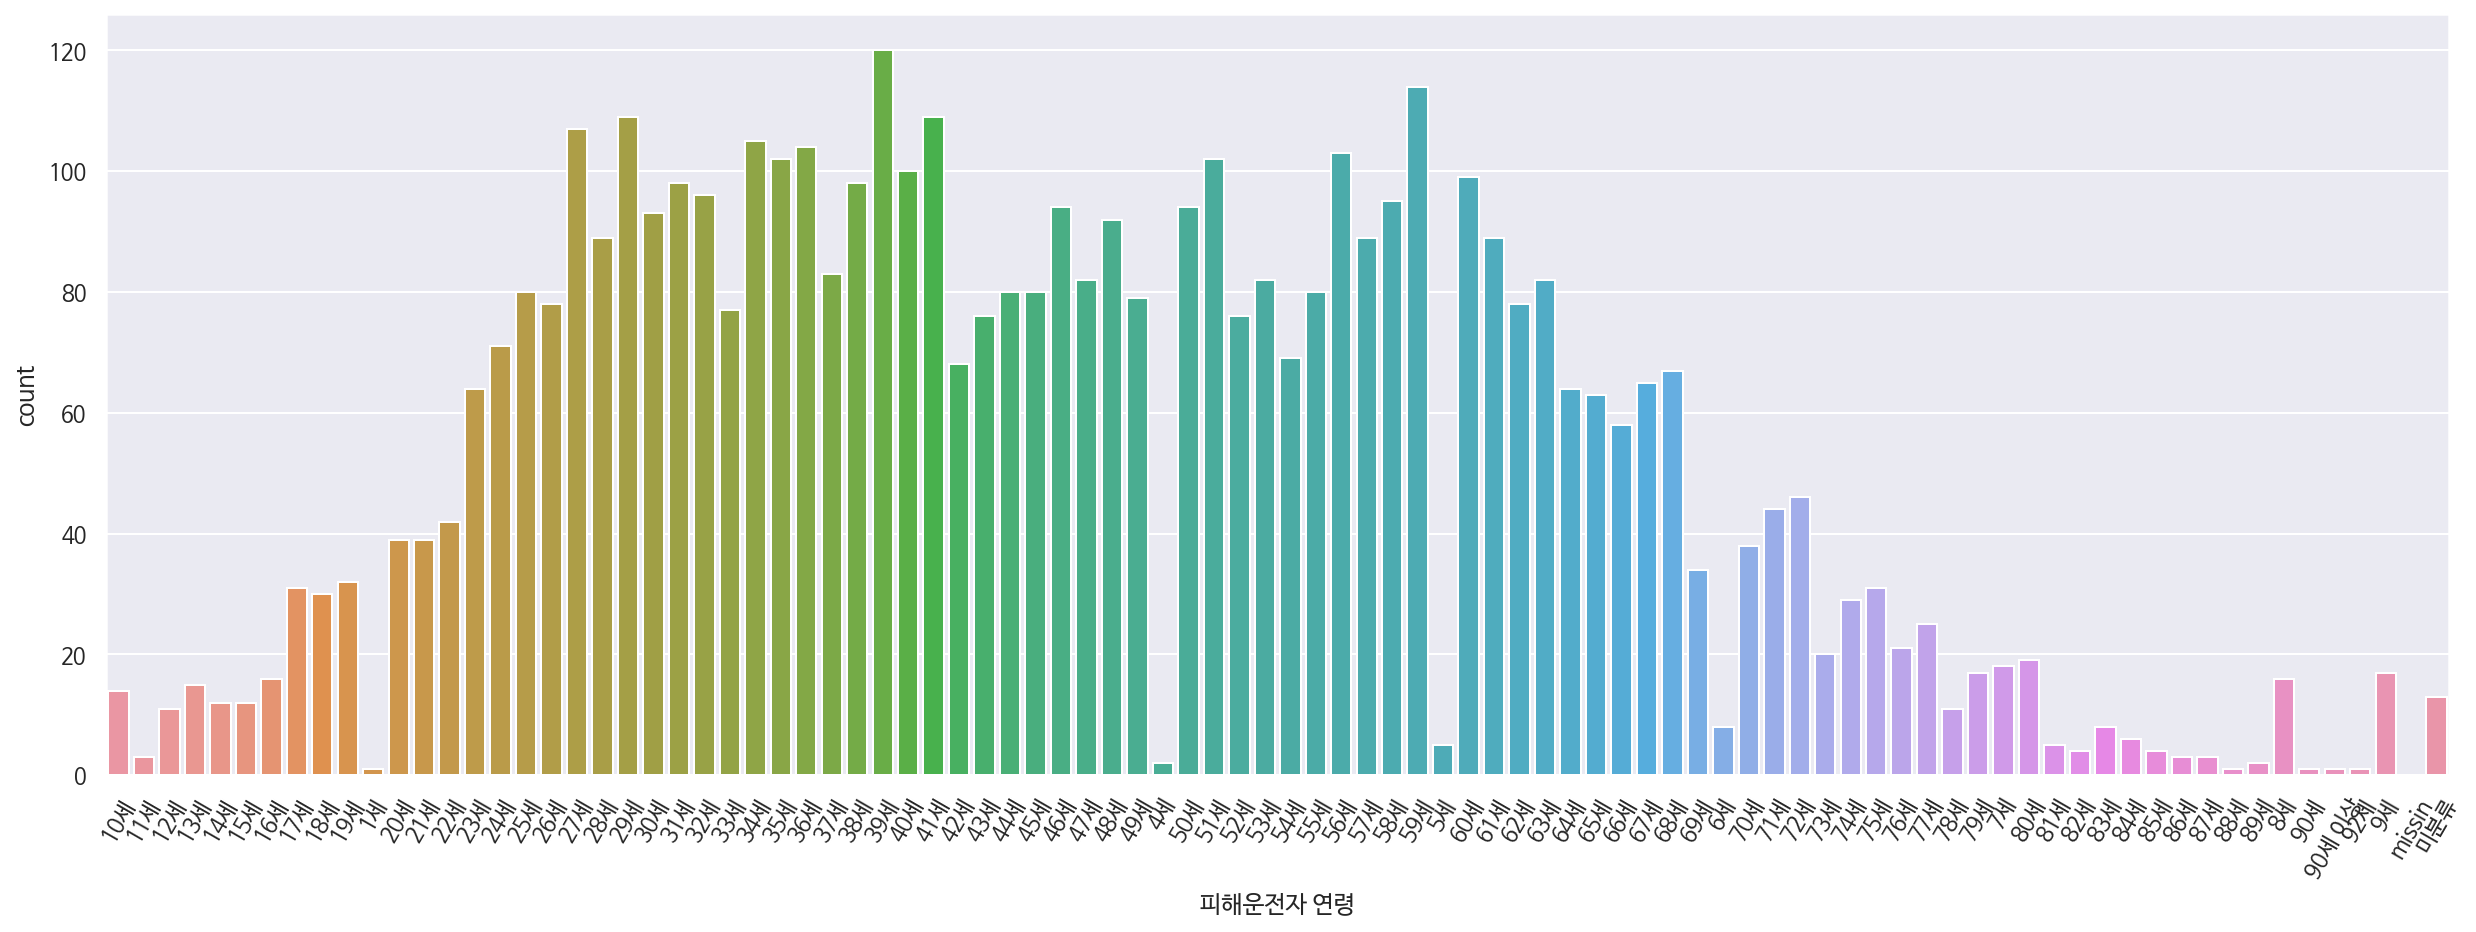

In [ ]:
age = df['피해운전자 연령'].unique()
new_age = age.astype(str)
new_age[age != age] = 'missing'
new_age.sort()

sns.set(rc={'figure.figsize':(21,7)})
plt.rc('font', family='NanumBarunGothic')

ax = sns.countplot(data=df, x='피해운전자 연령', order=new_age)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

## 3. 데이터 시각화

### 3-1. 법정동?과 경계 매핑

In [ ]:
df['동'] = df['시군구'].str.split().str[-1]

In [ ]:
df.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,동
0,2019010100100001,2019년 1월 1일 00시,화요일,서울특별시 강서구 방화동,경상사고,0,0,1,0,차대사람 - 횡단중,...,교차로 - 교차로횡단보도내,승용,남,26세,상해없음,보행자,남,40세,경상,방화동
1,2019010100100140,2019년 1월 1일 11시,화요일,서울특별시 강서구 마곡동,경상사고,0,0,3,0,차대차 - 기타,...,교차로 - 교차로부근,승용,여,62세,상해없음,승용,남,31세,경상,마곡동
2,2019010100100276,2019년 1월 1일 19시,화요일,서울특별시 강서구 방화동,중상사고,0,1,1,0,차대사람 - 횡단중,...,단일로 - 기타,승용,여,64세,상해없음,보행자,여,17세,중상,방화동
3,2019010200100187,2019년 1월 2일 12시,수요일,서울특별시 강서구 마곡동,경상사고,0,0,1,0,차대차 - 측면충돌,...,단일로 - 기타,승용,남,70세,상해없음,승용,남,27세,경상,마곡동
4,2019010200100237,2019년 1월 2일 14시,수요일,서울특별시 강서구 화곡동,경상사고,0,0,1,0,차대차 - 추돌,...,단일로 - 기타,이륜,남,25세,경상,이륜,남,26세,상해없음,화곡동


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 76.1 MB/s eta 0:00:00


In [ ]:
# https://map.ngii.go.kr/ms/map/NlipMap.do#

In [ ]:
dong_code = {'11500101':'염창동',
             '11500102':'등촌동',
             '11500103':'화곡동',
             '11500104':'가양동',
             '11500105':'마곡동',
             '11500106':'내발산동',
             '11500107':'외발산동',
             '11500108':'공항동',
             '11500109':'방화동',
             '11500110':'개화동',
             '11500111':'과해동',
             '11500112':'오곡동',
             '11500113':'오쇠동'}
# https://kimhongsi.tistory.com/entry/%ED%96%89%EC%A0%95%EA%B5%AC%EC%97%AD-%EC%BD%94%EB%93%9C-%EC%A0%95%EB%A6%AC-4%ED%8E%B8-%EC%9D%8D%EB%A9%B4%EB%8F%99-%EB%B2%95%EC%A0%95%EB%8F%99-%EB%8B%A8%EC%9C%84

### 3-2. 인구밀도 시각화

In [ ]:
import geopandas as gpd

# 데이터 불러오기
gdf = gpd.read_file(PATH+'data/nlsp_021001001.shp', encoding='cp949') # 강서구 인구밀도 경계

In [ ]:
gdf

In [ ]:
gdf['dong'] = gdf['gid'].apply(lambda x: dong_code[x])

<Axes: >

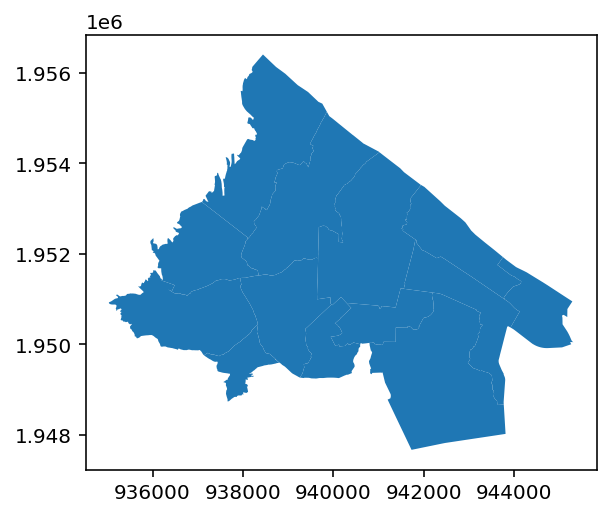

In [ ]:
gdf.plot()

In [ ]:
gdf.head()

,gid,lbl,val,geometry,dong
0,11500110,1677.00,1677.0,"POLYGON ((938441.176 1956407.663, 938467.145 1...",개화동
1,11500107,925.00,925.0,"MULTIPOLYGON (((940288.242 1950915.550, 940343...",외발산동
2,11500109,69891.00,69891.0,"POLYGON ((939989.911 1954982.128, 940009.523 1...",방화동
3,11500102,74158.00,74158.0,"POLYGON ((942184.464 1951145.184, 942170.827 1...",등촌동
4,11500105,54572.00,54572.0,"MULTIPOLYGON (((941632.661 1952881.378, 941632...",마곡동


In [ ]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# GeoDataFrame 생성
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')

# 중심 좌표 설정
# 지도 중심점 설정
center = [37.5665, 126.9784]

# folium 지도 생성
m = folium.Map(location=center, zoom_start=11)

# Choropleth 클래스를 사용하여 지도에 시각화
folium.Choropleth(
    geo_data=gdf,
    name='choropleth',
    data=gdf,
    columns=['gid', 'val'],
    key_on='feature.properties.gid',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value'
).add_to(m)

# 지도에 경계 추가
folium.GeoJson(gdf).add_to(m)

# 지도를 HTML 파일로 저장
m.save('map.html')

In [ ]:
m

### 3-3. 교통사고 시각화

#### 3-3-1. 원형 시각화
- 특정동(화곡동?)이 압도적으로 많아서 시각화가 안예쁘게 나옴

In [ ]:
from geopy.geocoders import Nominatim
import folium

# 각 동별 사고 건수 구하기
count = df['동'].value_counts()

# geocoders를 사용하여 주소를 위경도로 변환하기
geolocator = Nominatim(user_agent='myapplication')

location_list = []
for dong in count.index:
    try:
        location = geolocator.geocode(dong + ', 서울특별시')
        location_list.append((location.latitude, location.longitude, count[dong]))
    except:
        pass

# folium으로 지도 시각화
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start=11)

for location in location_list:
    folium.CircleMarker(
        location=[location[0], location[1]],
        radius=location[2] / 10,
        color='red',
        fill_color='red',
        fill_opacity=0.7
    ).add_to(seoul_map)

seoul_map

#### 3-3-2. 경계 히트맵 시각화

In [ ]:
gdf_car = gdf.copy()
gdf_car = gdf_car[gdf_car['dong'] != '강서구']
gdf_car

,gid,lbl,val,geometry,dong
0,11500110,1677.00,1677.0,"POLYGON ((938441.176 1956407.663, 938467.145 1...",개화동
1,11500107,925.00,925.0,"MULTIPOLYGON (((940288.242 1950915.550, 940343...",외발산동
2,11500109,69891.00,69891.0,"POLYGON ((939989.911 1954982.128, 940009.523 1...",방화동
3,11500102,74158.00,74158.0,"POLYGON ((942184.464 1951145.184, 942170.827 1...",등촌동
4,11500105,54572.00,54572.0,"MULTIPOLYGON (((941632.661 1952881.378, 941632...",마곡동
5,11500103,217000.00,217000.0,"POLYGON ((940794.698 1950032.919, 940831.048 1...",화곡동
6,11500104,44469.00,44469.0,"POLYGON ((942834.858 1952769.263, 942859.854 1...",가양동
7,11500106,44832.00,44832.0,"POLYGON ((942206.060 1950818.779, 942218.912 1...",내발산동
8,11500101,40736.00,40736.0,"POLYGON ((943747.749 1951927.954, 943787.078 1...",염창동
9,11500108,17898.00,17898.0,"POLYGON ((939659.713 1951878.676, 939659.052 1...",공항동


In [ ]:
count = df['동'].value_counts()
df_count = pd.DataFrame(count)
df_count

,동
화곡동,1849
등촌동,554
마곡동,551
방화동,501
가양동,403
염창동,303
공항동,244
내발산동,235
개화동,148
외발산동,91


In [ ]:
def mapping_dong_car(x):
    return df_count.loc[x['dong']]['동']

In [ ]:
gdf_car['val'] = gdf_car.apply(mapping_dong_car, axis=1)
gdf_car

,gid,lbl,val,geometry,dong
0,11500110,1677.00,148,"POLYGON ((938441.176 1956407.663, 938467.145 1...",개화동
1,11500107,925.00,91,"MULTIPOLYGON (((940288.242 1950915.550, 940343...",외발산동
2,11500109,69891.00,501,"POLYGON ((939989.911 1954982.128, 940009.523 1...",방화동
3,11500102,74158.00,554,"POLYGON ((942184.464 1951145.184, 942170.827 1...",등촌동
4,11500105,54572.00,551,"MULTIPOLYGON (((941632.661 1952881.378, 941632...",마곡동
5,11500103,217000.00,1849,"POLYGON ((940794.698 1950032.919, 940831.048 1...",화곡동
6,11500104,44469.00,403,"POLYGON ((942834.858 1952769.263, 942859.854 1...",가양동
7,11500106,44832.00,235,"POLYGON ((942206.060 1950818.779, 942218.912 1...",내발산동
8,11500101,40736.00,303,"POLYGON ((943747.749 1951927.954, 943787.078 1...",염창동
9,11500108,17898.00,244,"POLYGON ((939659.713 1951878.676, 939659.052 1...",공항동


In [ ]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# GeoDataFrame 생성
gdf_car = gpd.GeoDataFrame(gdf_car, geometry='geometry')

# 중심 좌표 설정
# 지도 중심점 설정
center = [37.5665, 126.9784]

# folium 지도 생성
m = folium.Map(location=center, zoom_start=11)

# Choropleth 클래스를 사용하여 지도에 시각화
folium.Choropleth(
    geo_data=gdf_car,
    name='choropleth',
    data=gdf_car,
    columns=['gid', 'val'],
    key_on='feature.properties.gid',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value'
).add_to(m)

# 지도에 행정동명 추가
folium.GeoJson(
    gdf_car,
    name='geojson',
    tooltip=folium.features.GeoJsonTooltip(fields=['dong'], aliases=['동'], localize=True),
).add_to(m)

# 지도를 HTML 파일로 저장
m.save('map.html')

m

#### 3-3-3. 인구밀도 대비 시각화

In [ ]:
gdf.head()

,gid,lbl,val,geometry,dong
0,11500110,1677.00,1677.0,"POLYGON ((938441.176 1956407.663, 938467.145 1...",개화동
1,11500107,925.00,925.0,"MULTIPOLYGON (((940288.242 1950915.550, 940343...",외발산동
2,11500109,69891.00,69891.0,"POLYGON ((939989.911 1954982.128, 940009.523 1...",방화동
3,11500102,74158.00,74158.0,"POLYGON ((942184.464 1951145.184, 942170.827 1...",등촌동
4,11500105,54572.00,54572.0,"MULTIPOLYGON (((941632.661 1952881.378, 941632...",마곡동


In [ ]:
gdf_car_people = gdf.copy()

In [ ]:
count = df['동'].value_counts()
df_count = pd.DataFrame(count)
df_count

,동
화곡동,1849
등촌동,554
마곡동,551
방화동,501
가양동,403
염창동,303
공항동,244
내발산동,235
개화동,148
외발산동,91


In [ ]:
gdf_dong_index = gdf.set_index('dong')
gdf_dong_index

,gid,lbl,val,geometry
dong,,,,
개화동,11500110,1677.00,1677.0,"POLYGON ((938441.176 1956407.663, 938467.145 1..."
외발산동,11500107,925.00,925.0,"MULTIPOLYGON (((940288.242 1950915.550, 940343..."
방화동,11500109,69891.00,69891.0,"POLYGON ((939989.911 1954982.128, 940009.523 1..."
등촌동,11500102,74158.00,74158.0,"POLYGON ((942184.464 1951145.184, 942170.827 1..."
마곡동,11500105,54572.00,54572.0,"MULTIPOLYGON (((941632.661 1952881.378, 941632..."
화곡동,11500103,217000.00,217000.0,"POLYGON ((940794.698 1950032.919, 940831.048 1..."
가양동,11500104,44469.00,44469.0,"POLYGON ((942834.858 1952769.263, 942859.854 1..."
내발산동,11500106,44832.00,44832.0,"POLYGON ((942206.060 1950818.779, 942218.912 1..."
염창동,11500101,40736.00,40736.0,"POLYGON ((943747.749 1951927.954, 943787.078 1..."


In [ ]:
def mapping_dong_car_people(x):
    if x['dong'] in df_count['동']:
        return gdf_dong_index.loc[x['dong']]['val'] // df_count.loc[x['dong']]['동']
    else:
        return 0

In [ ]:
gdf_car_people['val'] = gdf_car_people.apply(mapping_dong_car_people, axis=1)
gdf_car_people

,gid,lbl,val,geometry,dong
0,11500110,1677.00,11.0,"POLYGON ((938441.176 1956407.663, 938467.145 1...",개화동
1,11500107,925.00,10.0,"MULTIPOLYGON (((940288.242 1950915.550, 940343...",외발산동
2,11500109,69891.00,139.0,"POLYGON ((939989.911 1954982.128, 940009.523 1...",방화동
3,11500102,74158.00,133.0,"POLYGON ((942184.464 1951145.184, 942170.827 1...",등촌동
4,11500105,54572.00,99.0,"MULTIPOLYGON (((941632.661 1952881.378, 941632...",마곡동
5,11500103,217000.00,117.0,"POLYGON ((940794.698 1950032.919, 940831.048 1...",화곡동
6,11500104,44469.00,110.0,"POLYGON ((942834.858 1952769.263, 942859.854 1...",가양동
7,11500106,44832.00,190.0,"POLYGON ((942206.060 1950818.779, 942218.912 1...",내발산동
8,11500101,40736.00,134.0,"POLYGON ((943747.749 1951927.954, 943787.078 1...",염창동
9,11500108,17898.00,73.0,"POLYGON ((939659.713 1951878.676, 939659.052 1...",공항동


In [ ]:
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# GeoDataFrame 생성
gdf_car_people = gpd.GeoDataFrame(gdf_car_people, geometry='geometry')

# 중심 좌표 설정
# 지도 중심점 설정
center = [37.5665, 126.9784]

# folium 지도 생성
m = folium.Map(location=center, zoom_start=11)

# Choropleth 클래스를 사용하여 지도에 시각화
folium.Choropleth(
    geo_data=gdf_car_people,
    name='choropleth',
    data=gdf_car_people,
    columns=['gid', 'val'],
    key_on='feature.properties.gid',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Value'
).add_to(m)

# 지도에 행정동명 추가
folium.GeoJson(
    gdf_car_people,
    name='geojson',
    tooltip=folium.features.GeoJsonTooltip(fields=['dong'], aliases=['동'], localize=True),
).add_to(m)

# 지도를 HTML 파일로 저장
m.save('map.html')

m

- 검은색으로 칠해진 과해동은 김포공항 근처로 사람이 살지 않음
- 내발산동이 인구밀도 대비 교통사고 건수가
    - +방화동, 등촌동, 염창동

#### 3-3-4. 동별 시각화

In [ ]:
df.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도', '동'],
      dtype='object')

In [ ]:
df_viz = df.copy()
df_viz = df_viz.drop(['사고번호', '사고일시', '요일', '시군구', '가해운전자 성별', '가해운전자 연령', '피해운전자 성별', '피해운전자 연령'], axis=1)
df_viz.head()

,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 상해정도,피해운전자 차종,피해운전자 상해정도,동
0,경상사고,0,0,1,0,차대사람 - 횡단중,보행자보호의무위반,포장 - 건조,맑음,교차로 - 교차로횡단보도내,승용,상해없음,보행자,경상,방화동
1,경상사고,0,0,3,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,상해없음,승용,경상,마곡동
2,중상사고,0,1,1,0,차대사람 - 횡단중,신호위반,포장 - 건조,맑음,단일로 - 기타,승용,상해없음,보행자,중상,방화동
3,경상사고,0,0,1,0,차대차 - 측면충돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,상해없음,승용,경상,마곡동
4,경상사고,0,0,1,0,차대차 - 추돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,이륜,경상,이륜,상해없음,화곡동


In [ ]:
df_viz['동'].unique()

array(['방화동', '마곡동', '화곡동', '염창동', '등촌동', '내발산동', '공항동', '가양동', '개화동',
       '과해동', '외발산동', '오곡동', '오쇠동'], dtype=object)

In [ ]:
df_ac_type = df.groupby(["동", '사고내용'])['사고번호'].count().unstack().fillna(0)
df_ac_type

사고내용,경상사고,부상신고사고,사망사고,중상사고
동,,,,
가양동,288.0,16.0,3.0,96.0
개화동,103.0,4.0,4.0,37.0
공항동,166.0,8.0,6.0,64.0
과해동,13.0,0.0,0.0,2.0
내발산동,163.0,9.0,0.0,63.0
등촌동,386.0,37.0,5.0,126.0
마곡동,363.0,22.0,6.0,160.0
방화동,327.0,25.0,7.0,142.0
염창동,204.0,14.0,8.0,77.0


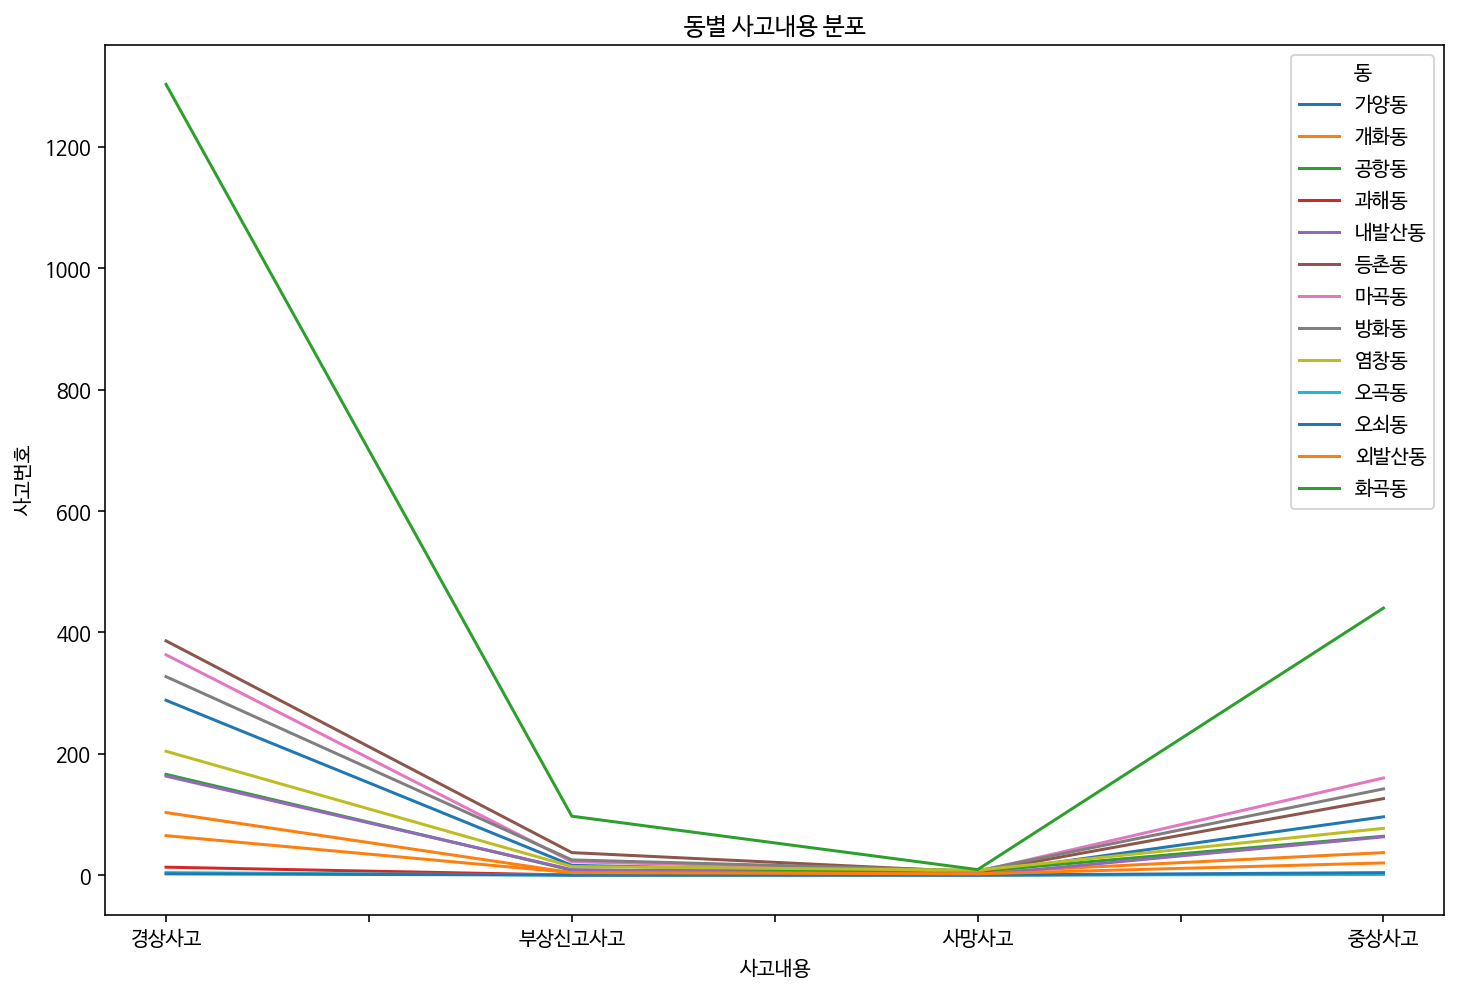

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))
df_ac_type.T.plot(ax=ax)
ax.set_xlabel('사고내용')
ax.set_ylabel('사고번호')
plt.title('동별 사고내용 분포')
plt.show()

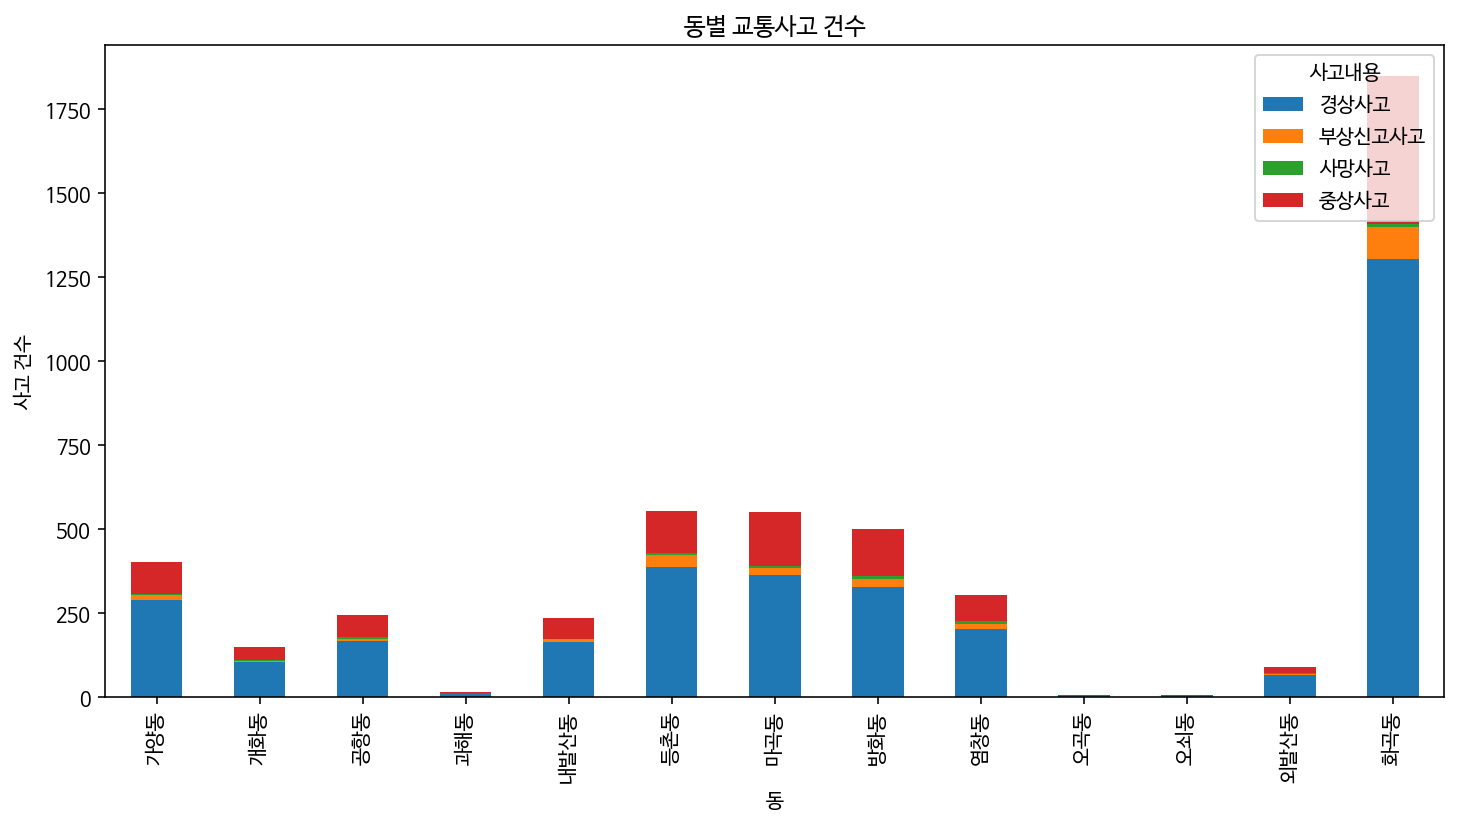

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))

df_ac_type.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('동')
ax.set_ylabel('사고 건수')
ax.set_title('동별 교통사고 건수')

plt.legend(title='사고내용', loc='upper right')
plt.show()


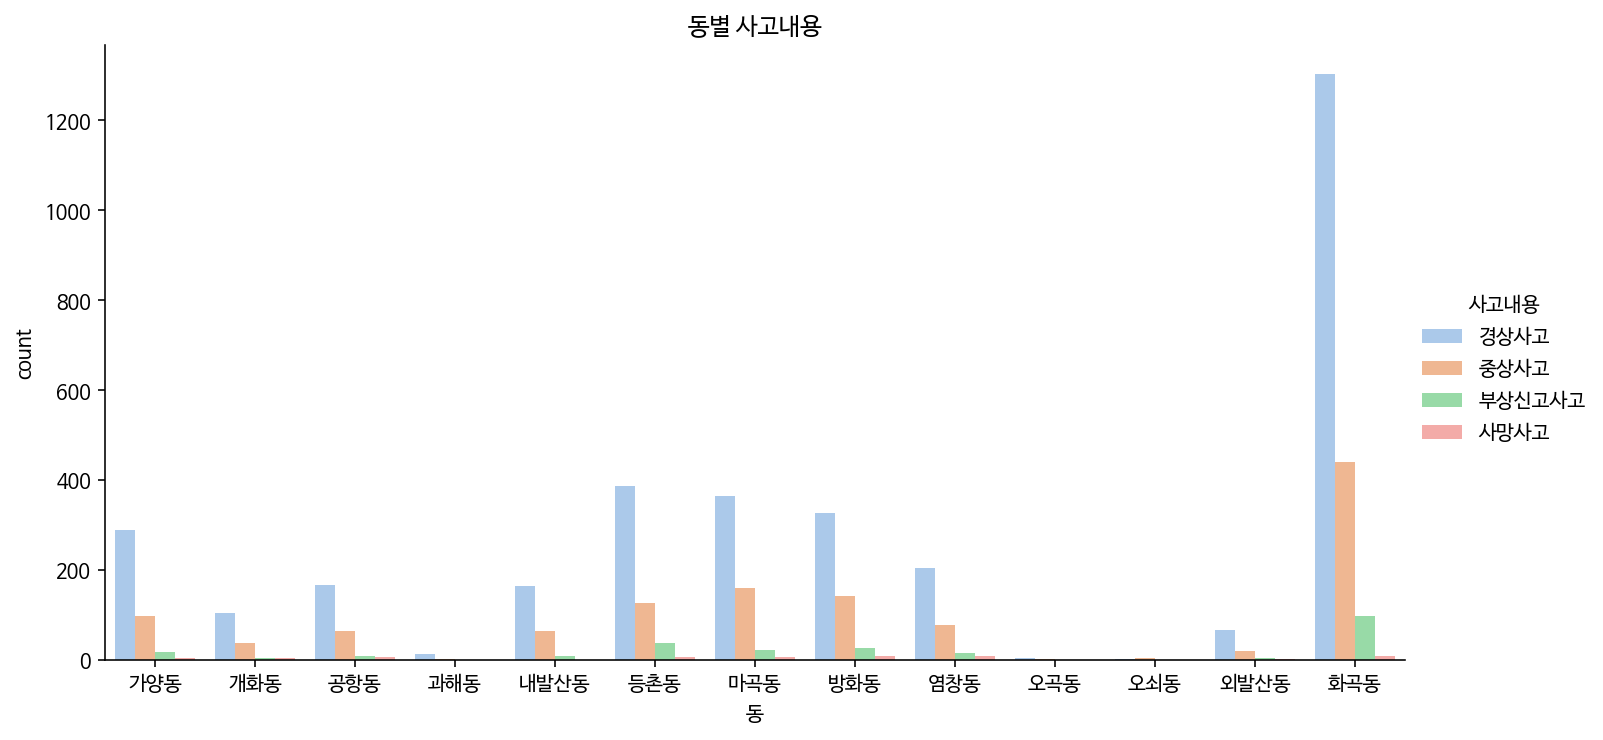

In [ ]:
df_melt = pd.melt(df_ac_type.reset_index(), id_vars=['동'], value_vars=['경상사고', '중상사고', '부상신고사고', '사망사고'], var_name='사고내용', value_name='count')

# 막대 그래프 그리기
sns.set_palette('pastel')
sns.catplot(x='동', y='count', hue='사고내용', data=df_melt, kind='bar', height=5, aspect=2)
plt.title('동별 사고내용')
plt.show()

In [ ]:
df_viz['법규위반'].value_counts()

안전운전불이행      2884
신호위반          683
안전거리미확보       484
중앙선침범         198
보행자보호의무위반     189
기타            180
교차로운행방법위반     102
직진우회전진행방해      81
차로위반           61
불법유턴           28
과속             15
Name: 법규위반, dtype: int64

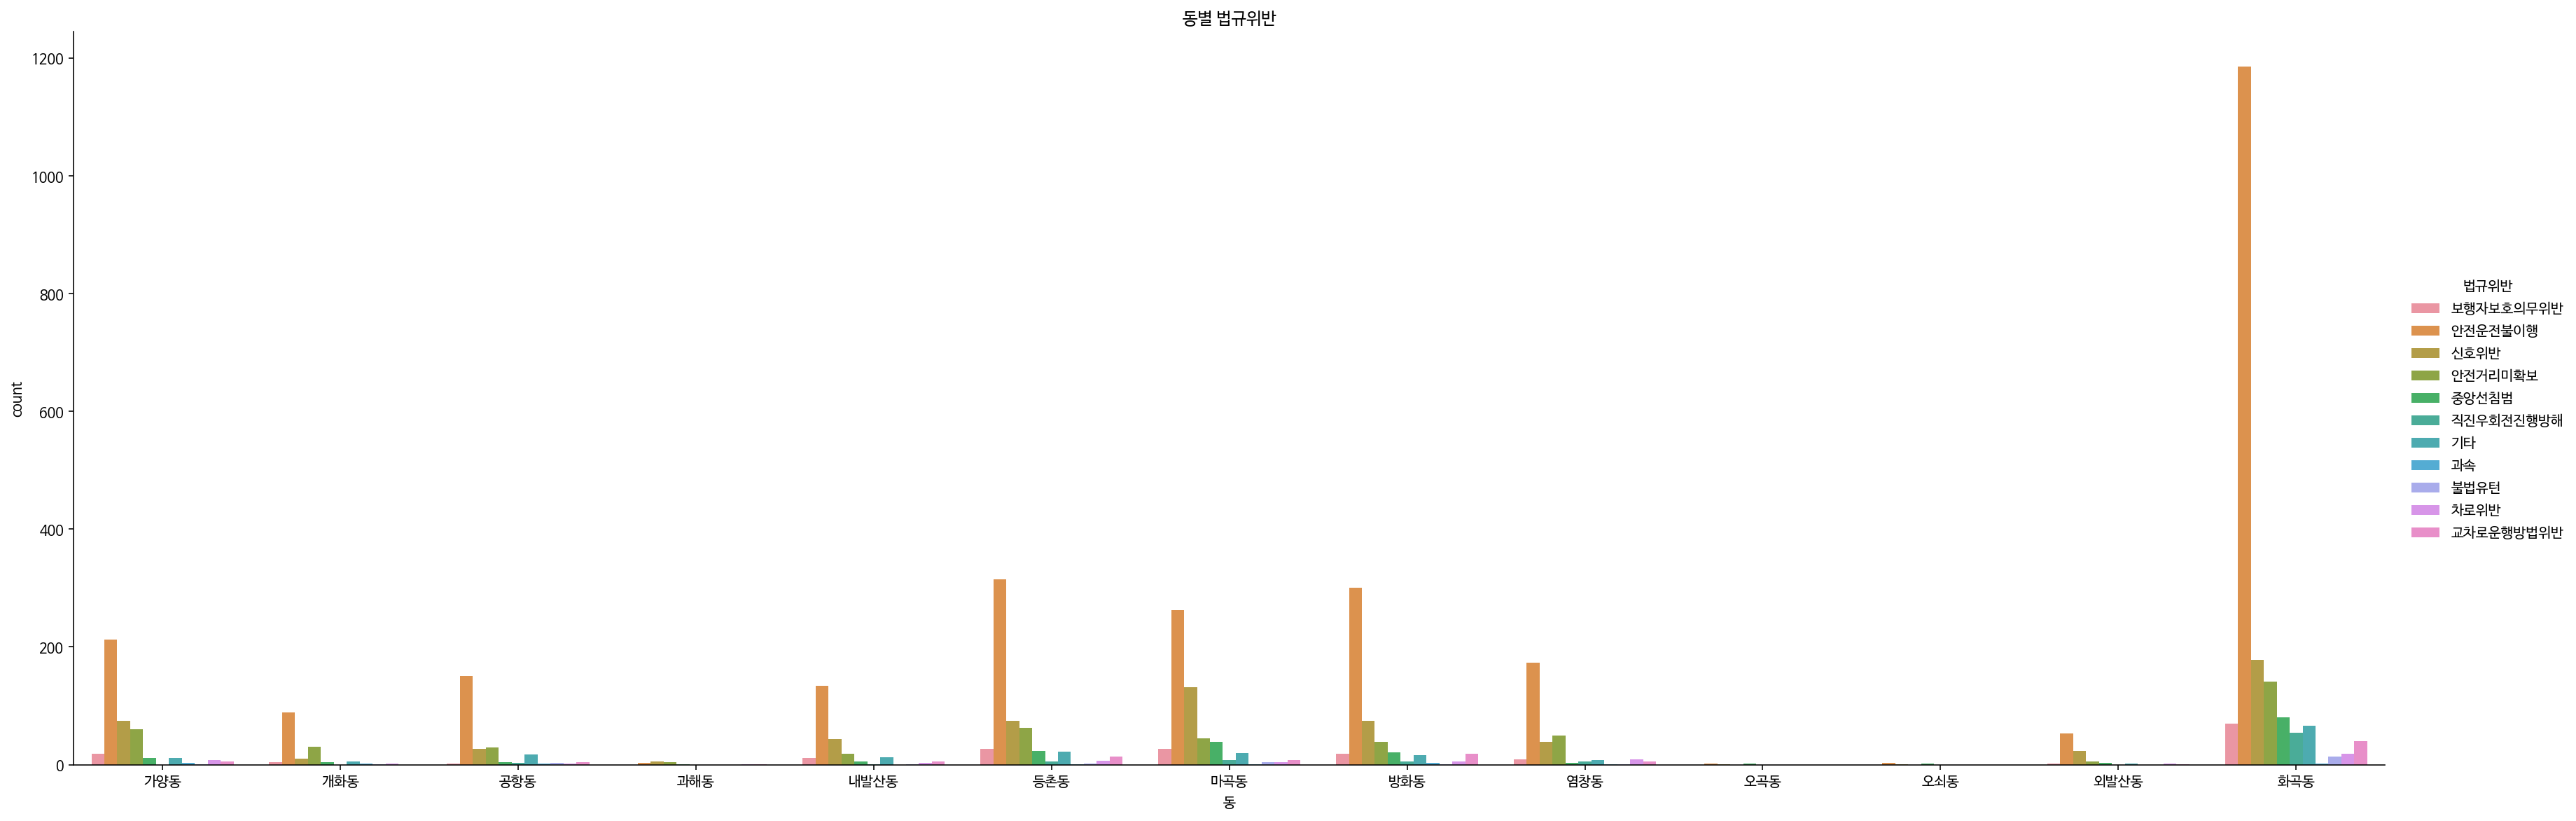

In [ ]:
df_ac_leg = df.groupby(["동", '법규위반'])['사고번호'].count().unstack().fillna(0)
df_melt = pd.melt(df_ac_leg.reset_index(), id_vars=['동'], value_vars=df_viz['법규위반'].unique(), var_name='법규위반', value_name='count')

# 막대 그래프 그리기
sns.set_palette('pastel')
sns.catplot(x='동', y='count', hue='법규위반', data=df_melt, kind='bar', height=8, aspect=3)
plt.title('동별 법규위반')
plt.show()

안전운전, 신호위반으로 인한 교통사고가 다수 -> CCTV 설치 필요성

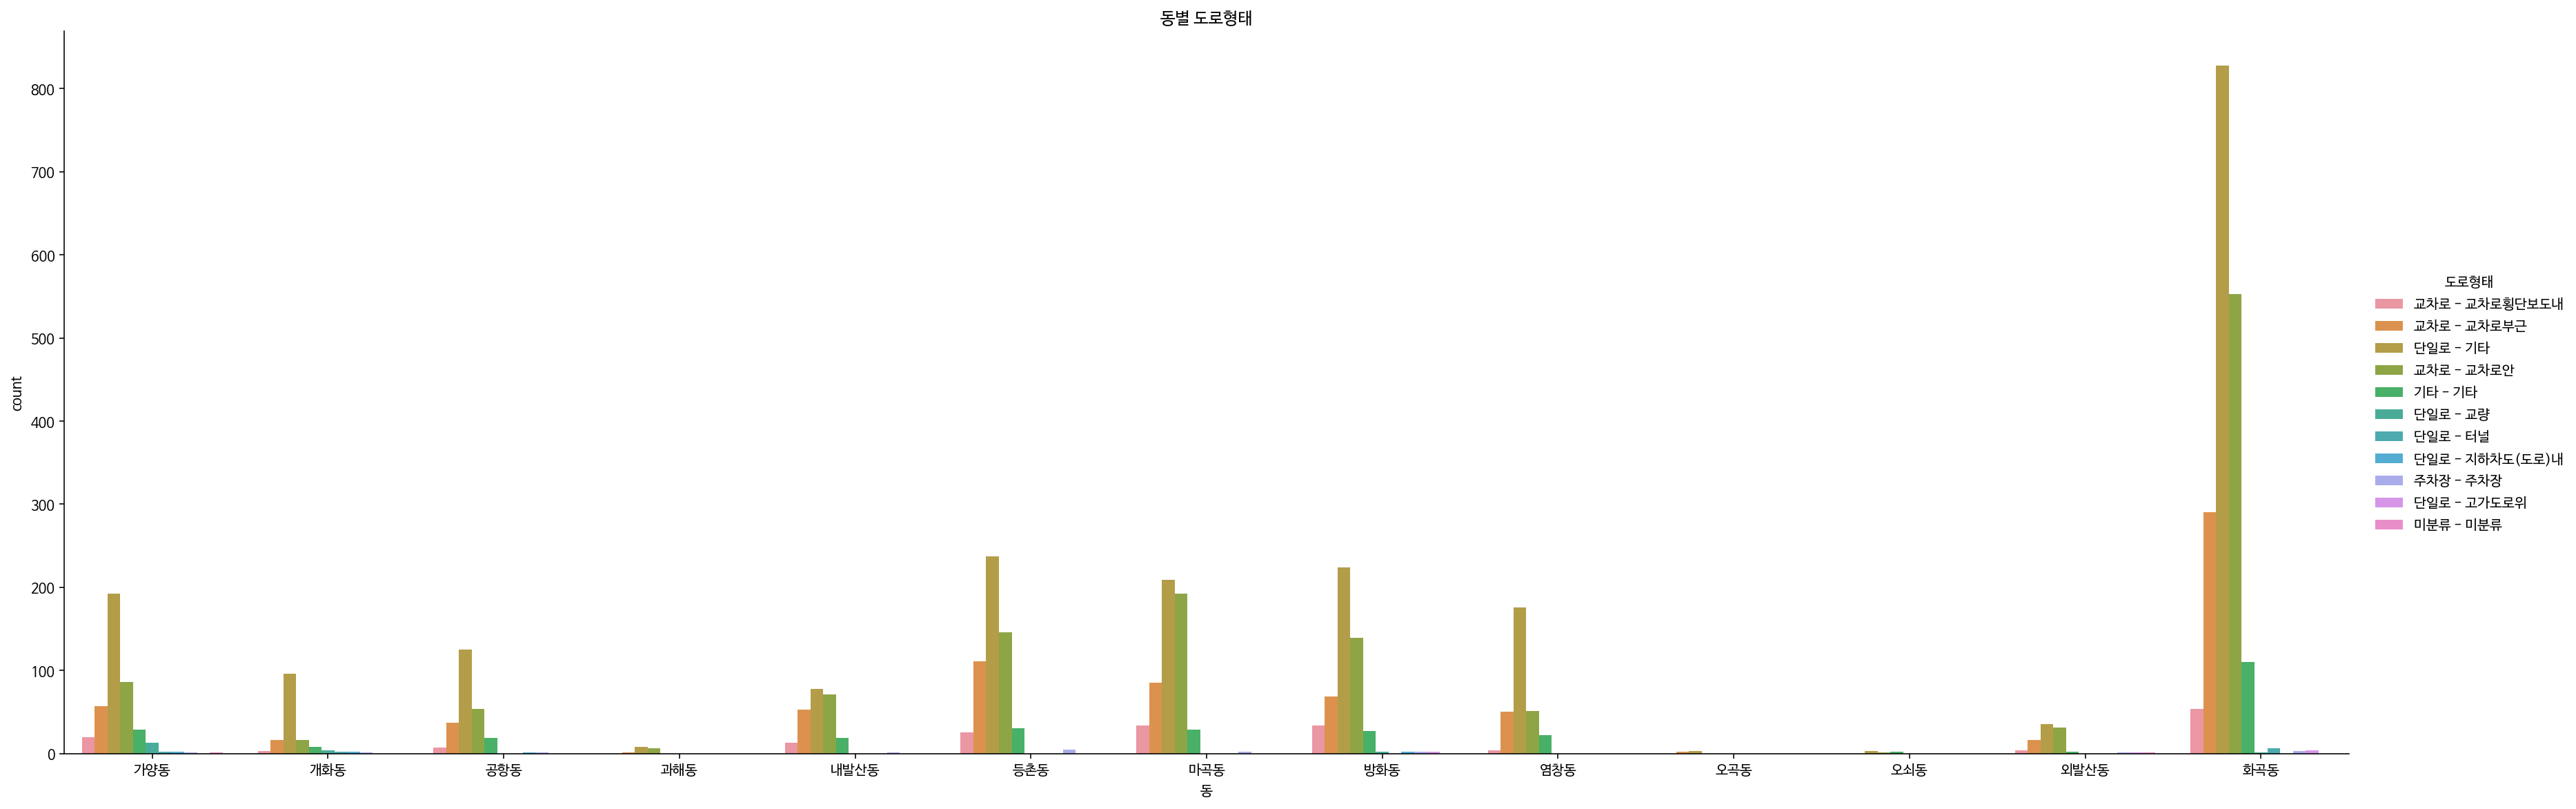

In [ ]:
df_ac_leg = df.groupby(["동", '도로형태'])['사고번호'].count().unstack().fillna(0)
df_melt = pd.melt(df_ac_leg.reset_index(), id_vars=['동'], value_vars=df_viz['도로형태'].unique(), var_name='도로형태', value_name='count')

# 막대 그래프 그리기
sns.set_palette('pastel')
sns.catplot(x='동', y='count', hue='도로형태', data=df_melt, kind='bar', height=8, aspect=3)
plt.title('동별 도로형태')
plt.show()

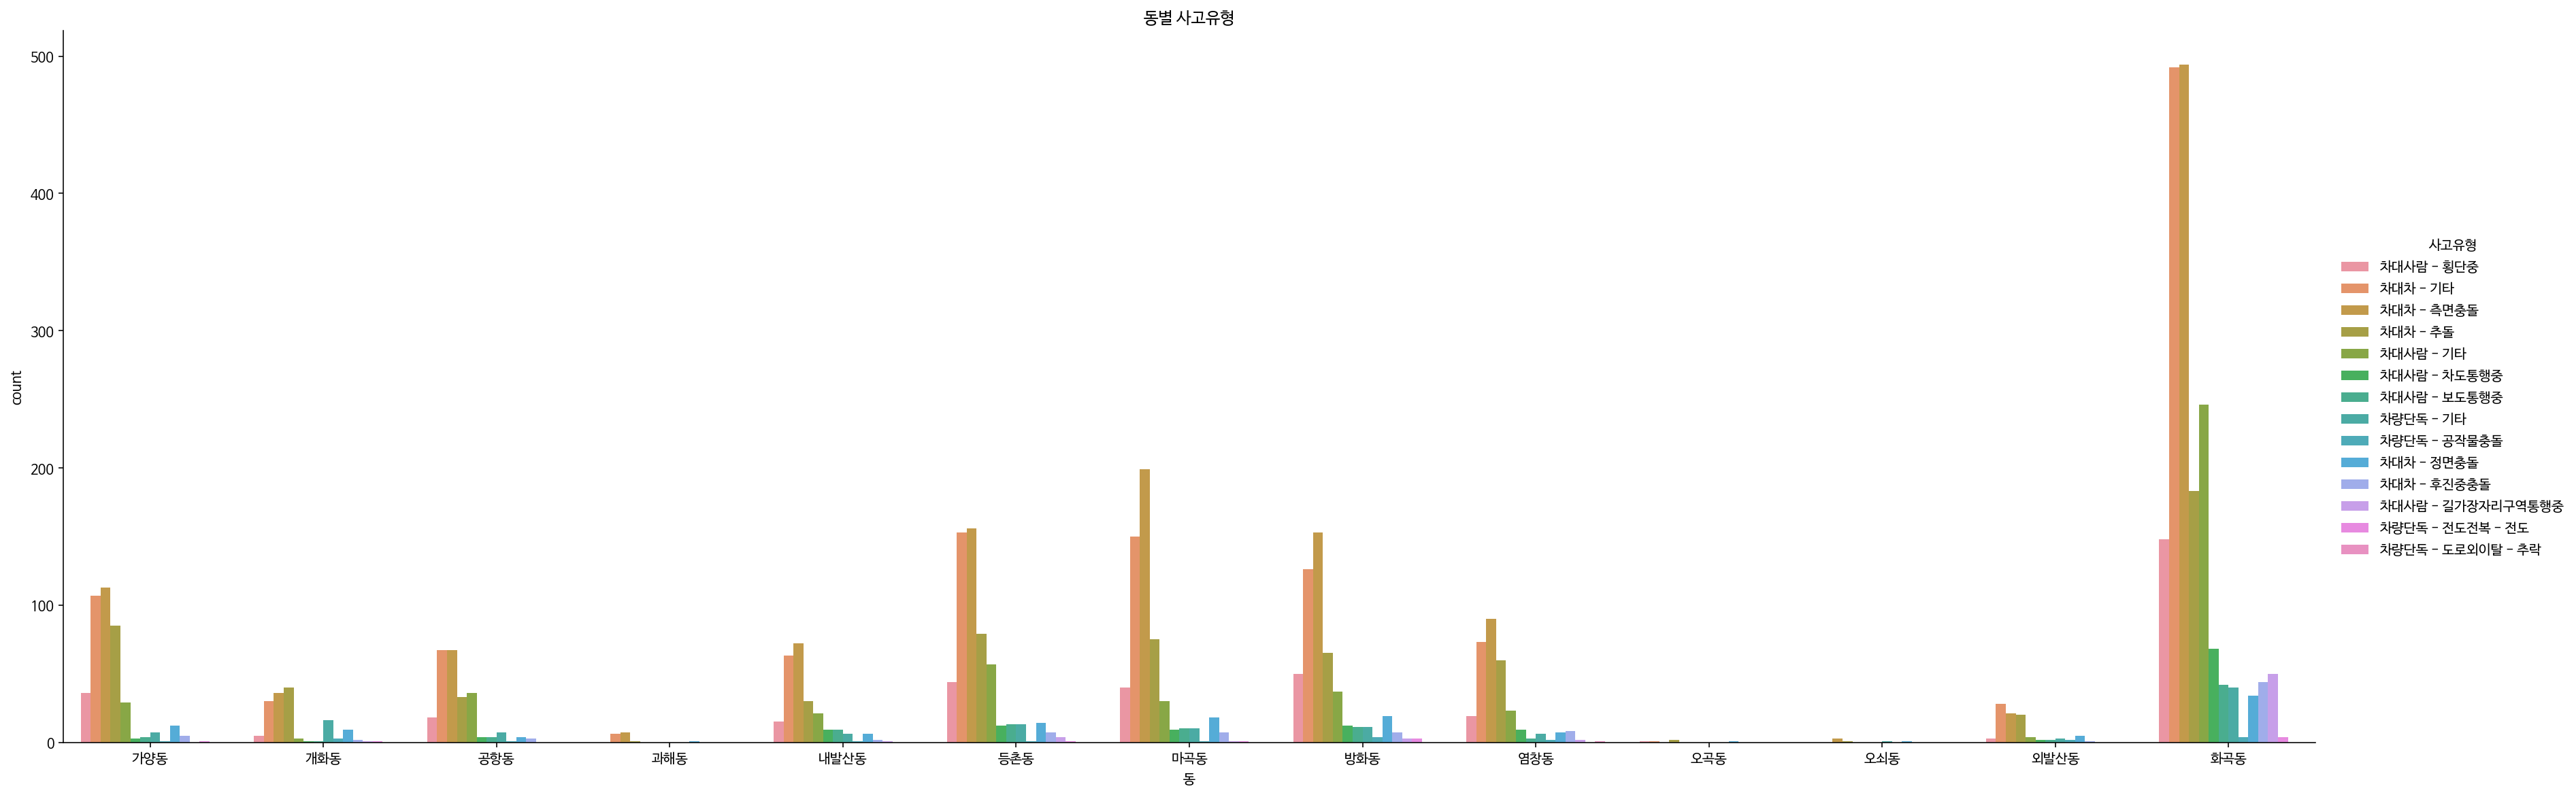

In [ ]:
df_ac_leg = df.groupby(["동", '사고유형'])['사고번호'].count().unstack().fillna(0)
df_melt = pd.melt(df_ac_leg.reset_index(), id_vars=['동'], value_vars=df_viz['사고유형'].unique(), var_name='사고유형', value_name='count')

# 막대 그래프 그리기
sns.set_palette('pastel')
sns.catplot(x='동', y='count', hue='사고유형', data=df_melt, kind='bar', height=8, aspect=3)
plt.title('동별 사고유형')
plt.show()

- 차대차 교통사고가 많아서 사대사람으로 제한

In [ ]:
acc_type_col = ['차대사람 - 횡단중', '차대사람 - 기타', '차대사람 - 차도통행중', '차대사람 - 보도통행중', '차대사람 - 길가장자리구역통행중']

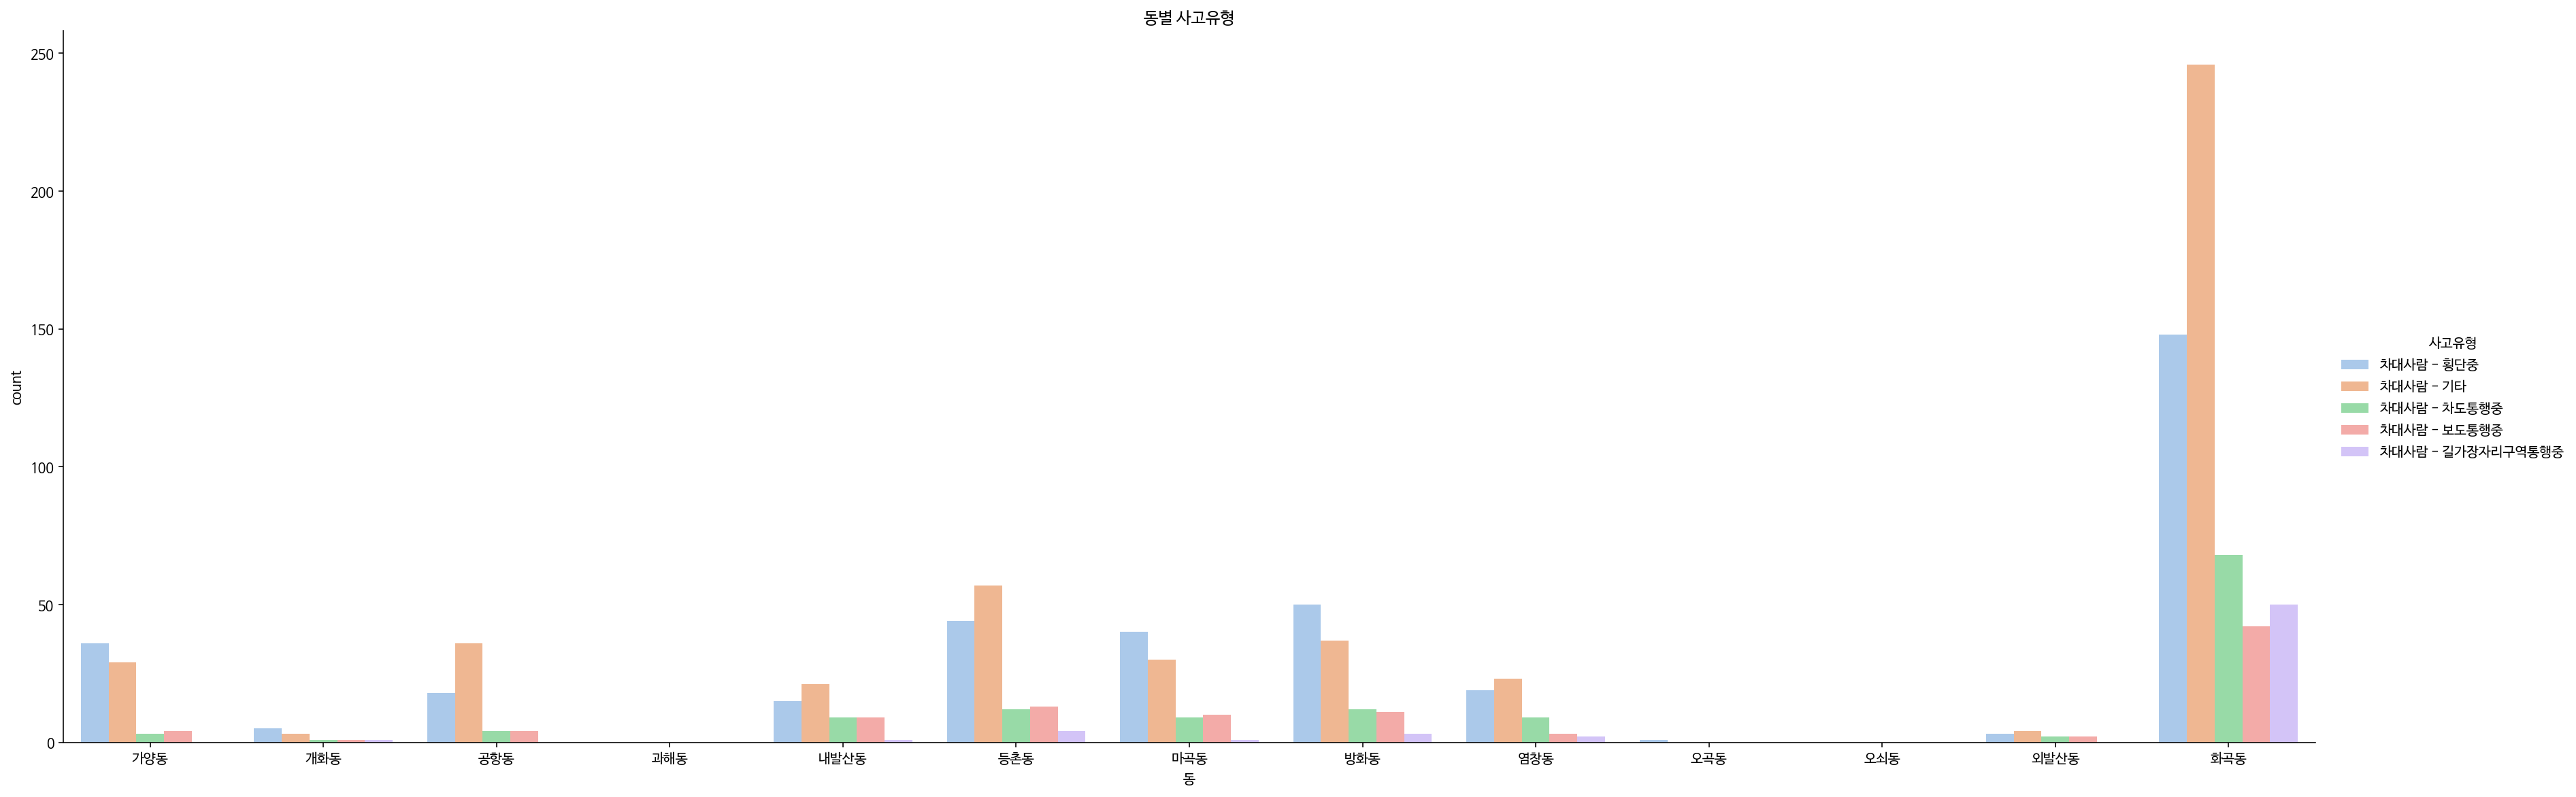

In [ ]:
df_ac_leg = df.groupby(["동", '사고유형'])['사고번호'].count().unstack().fillna(0)
df_melt = pd.melt(df_ac_leg.reset_index(), id_vars=['동'], value_vars=acc_type_col, var_name='사고유형', value_name='count')

# 막대 그래프 그리기
sns.set_palette('pastel')
sns.catplot(x='동', y='count', hue='사고유형', data=df_melt, kind='bar', height=8, aspect=3)
plt.title('동별 사고유형')
plt.show()

## 4. 데이터 분석
- 타겟변수를 동으로 머신러닝 모델을 돌려볼까요??
    - ex. 랜덤포레스트 모델에서 변수별 중요도 확인

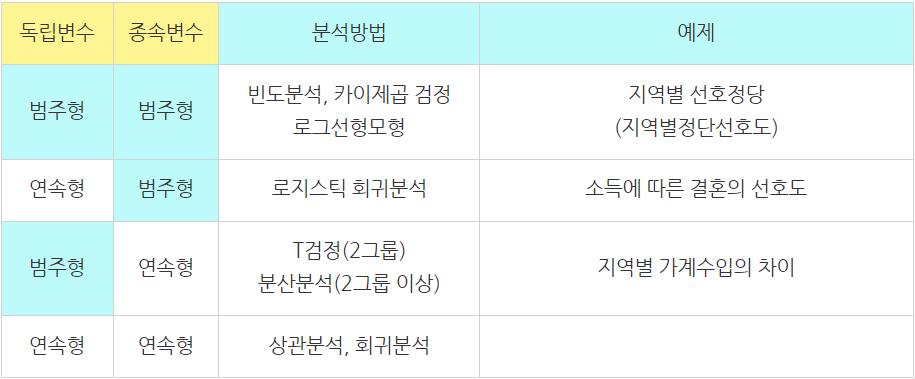

In [ ]:
df.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,동
0,2019010100100001,2019년 1월 1일 00시,화요일,서울특별시 강서구 방화동,경상사고,0,0,1,0,차대사람 - 횡단중,...,교차로 - 교차로횡단보도내,승용,남,26세,상해없음,보행자,남,40세,경상,방화동
1,2019010100100140,2019년 1월 1일 11시,화요일,서울특별시 강서구 마곡동,경상사고,0,0,3,0,차대차 - 기타,...,교차로 - 교차로부근,승용,여,62세,상해없음,승용,남,31세,경상,마곡동
2,2019010100100276,2019년 1월 1일 19시,화요일,서울특별시 강서구 방화동,중상사고,0,1,1,0,차대사람 - 횡단중,...,단일로 - 기타,승용,여,64세,상해없음,보행자,여,17세,중상,방화동
3,2019010200100187,2019년 1월 2일 12시,수요일,서울특별시 강서구 마곡동,경상사고,0,0,1,0,차대차 - 측면충돌,...,단일로 - 기타,승용,남,70세,상해없음,승용,남,27세,경상,마곡동
4,2019010200100237,2019년 1월 2일 14시,수요일,서울특별시 강서구 화곡동,경상사고,0,0,1,0,차대차 - 추돌,...,단일로 - 기타,이륜,남,25세,경상,이륜,남,26세,상해없음,화곡동


In [ ]:
df.columns

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도', '동'],
      dtype='object')

In [ ]:
df_alz = df.drop(['사고번호', '사고일시', '요일', '시군구', '가해운전자 연령', '피해운전자 연령', '가해운전자 성별', '피해운전자 성별'], axis=1)
df_alz.head()

,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 상해정도,피해운전자 차종,피해운전자 상해정도,동
0,경상사고,0,0,1,0,차대사람 - 횡단중,보행자보호의무위반,포장 - 건조,맑음,교차로 - 교차로횡단보도내,승용,상해없음,보행자,경상,방화동
1,경상사고,0,0,3,0,차대차 - 기타,안전운전불이행,포장 - 건조,맑음,교차로 - 교차로부근,승용,상해없음,승용,경상,마곡동
2,중상사고,0,1,1,0,차대사람 - 횡단중,신호위반,포장 - 건조,맑음,단일로 - 기타,승용,상해없음,보행자,중상,방화동
3,경상사고,0,0,1,0,차대차 - 측면충돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,상해없음,승용,경상,마곡동
4,경상사고,0,0,1,0,차대차 - 추돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,이륜,경상,이륜,상해없음,화곡동


- 성별과 연령은 데이터 분석과 지리적 요건과 거리가 멀어서 제외 + 결측치도 많음

### 4-1. 연속형 변수
- 로지스틱 회귀 분석 -> 소프트맥스 회귀(Softmax Regression)

In [ ]:
cont_col = ['사망자수', '중상자수', '경상자수', '부상신고자수']

In [ ]:
df_alz[cont_col]

,사망자수,중상자수,경상자수,부상신고자수
0,0,0,1,0
1,0,0,3,0
2,0,1,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
4900,0,0,2,0
4901,0,0,2,0
4902,0,0,2,0
4903,0,0,2,0


In [ ]:
import statsmodels.api as sm

In [ ]:
dongs = df_alz['동'].unique()
dongs

array(['방화동', '마곡동', '화곡동', '염창동', '등촌동', '내발산동', '공항동', '가양동', '개화동',
       '과해동', '외발산동', '오곡동', '오쇠동'], dtype=object)

In [ ]:
for d in dongs:
    model = sm.Logit(df_alz['동'].apply(lambda x: 1 if x==d else 0), df_alz[cont_col])
    result = model.fit()
    print("============================="+d+"=========================================")
    print(result.summary())
    print("======================================================================")

Optimization terminated successfully.
         Current function value: 0.369726
         Iterations 7
=============================방화동=========================================
                           Logit Regression Results                           
Dep. Variable:                      동   No. Observations:                 4905
Model:                          Logit   Df Residuals:                     4901
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                 -0.1212
Time:                        12:07:58   Log-Likelihood:                -1813.5
converged:                       True   LL-Null:                       -1617.5
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
사망자수          -1.6692      0.412  

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Optimization terminated successfully.
         Current function value: 0.330584
         Iterations 7
=============================가양동=========================================
                           Logit Regression Results                           
Dep. Variable:                      동   No. Observations:                 4905
Model:                          Logit   Df Residuals:                     4901
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                 -0.1640
Time:                        12:07:59   Log-Likelihood:                -1621.5
converged:                       True   LL-Null:                       -1393.1
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
사망자수          -2.6176      0.598  

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: 0.012642
         Iterations: 35
=============================오곡동=========================================
                           Logit Regression Results                           
Dep. Variable:                      동   No. Observations:                 4905
Model:                          Logit   Df Residuals:                     4901
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                 -0.5722
Time:                        12:07:59   Log-Likelihood:                -62.007
converged:                      False   LL-Null:                       -39.440
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
사망자수         -10.2794     25.730     -0.400      0.690     -60.709    

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                      동   No. Observations:                 4905
Model:                          Logit   Df Residuals:                     4901
Method:                           MLE   Df Model:                            3
Date:                Tue, 21 Mar 2023   Pseudo R-squ.:                 -0.5710
Time:                        12:07:59   Log-Likelihood:                -72.634
converged:                      False   LL-Null:                       -46.234
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
사망자수         -23.3482   1.77e+04     -0.001      0.999   -3.47e+04    3.47e+04
중상자수          -5.0717      0.409    -12.387      0.000      -5.874      -4.269
경상자수          -6.2371      0.447    -13.939      0.0

### 4-2. 범주형 변수
- 범주형은 카이제곱 써야함

In [ ]:
cat_col = df_alz.columns
cat_col = cat_col.drop(['사망자수', '중상자수', '경상자수', '부상신고자수'])
cat_col

Index(['사고내용', '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종',
       '가해운전자 상해정도', '피해운전자 차종', '피해운전자 상해정도', '동'],
      dtype='object')

In [ ]:
from scipy.stats import chi2_contingency

for c in cat_col:
    chi2, pvalue, dof, expected = chi2_contingency(df_alz[cat_col].groupby(["동", c])[c].count().unstack().fillna(0))

    msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
    print("========================="+c+"===========================")
    print(msg.format(chi2, pvalue, dof))
    print(expected)
    print("============================================================")

=========================사고내용===========================
Test Statistic: 56.378793765953965
p-value: 0.01649399081685958
Degree of Freedom: 36
[[2.78279511e+02 1.93900102e+01 4.10805301e+00 1.01222426e+02]
 [1.02196942e+02 7.12089704e+00 1.50866463e+00 3.71734964e+01]
 [1.68486850e+02 1.17398573e+01 2.48725790e+00 6.12860347e+01]
 [1.03577982e+01 7.21712538e-01 1.52905199e-01 3.76758410e+00]
 [1.62272171e+02 1.13068298e+01 2.39551478e+00 5.90254842e+01]
 [3.82548012e+02 2.66552497e+01 5.64729867e+00 1.39149439e+02]
 [3.80476453e+02 2.65109072e+01 5.61671764e+00 1.38395923e+02]
 [3.45950459e+02 2.41051988e+01 5.10703364e+00 1.25837309e+02]
 [2.09227523e+02 1.45785933e+01 3.08868502e+00 7.61051988e+01]
 [3.45259939e+00 2.40570846e-01 5.09683996e-02 1.25586137e+00]
 [4.14311927e+00 2.88685015e-01 6.11620795e-02 1.50703364e+00]
 [6.28373089e+01 4.37838940e+00 9.27624873e-01 2.28566769e+01]
 [1.27677125e+03 8.89630989e+01 1.88481142e+01 4.64417533e+02]]
=========================사고유형========

- 차대사람, 법규위반(안전), 사망/중상사고 건수, 도로유형을 가중치로 교통사고에 관한 파생 변수 생성하여

- 최종 모델에 변수로 추가

- 예상질문: 블랙박스가 있는데 굳이?

## 5. 스코어링

In [ ]:
score_car = pd.DataFrame(gdf_car).sort_values(by='val')[['dong', 'gid', 'val']].reset_index().drop(['index'], axis=1).reset_index()
score_car

,index,dong,gid,val
0,0,오곡동,11500112,5
1,1,오쇠동,11500113,6
2,2,과해동,11500111,15
3,3,외발산동,11500107,91
4,4,개화동,11500110,148
5,5,내발산동,11500106,235
6,6,공항동,11500108,244
7,7,염창동,11500101,303
8,8,가양동,11500104,403
9,9,방화동,11500109,501


In [ ]:
score_car_people = pd.DataFrame(gdf_car_people).fillna(0).sort_values(by='val')[['dong', 'gid', 'val']].reset_index().drop(['index'], axis=1).reset_index()
score_car_people

,index,dong,gid,val
0,0,오쇠동,11500113,0.0
1,1,과해동,11500111,0.0
2,2,오곡동,11500112,1.0
3,3,외발산동,11500107,10.0
4,4,개화동,11500110,11.0
5,5,공항동,11500108,73.0
6,6,마곡동,11500105,99.0
7,7,가양동,11500104,110.0
8,8,화곡동,11500103,117.0
9,9,등촌동,11500102,133.0


In [ ]:
score_car.to_csv(PATH+'score_data/score_car.csv', index=False)
score_car_people.to_csv(PATH+'score_data/score_car_people.csv', index=False)